# Lending Club Case Study

## Problem Statement

A Consumer finance company which specialises in lending various types of loans to urban customers, has to analyse the loan application and decide whether to approve the loan or not based on the applicant Profile. In this analysis, with the given data which contains the information about past loan applicants, we are going to analyse the various factors that affecting the person likely to default or not. From this anaysis we will try to answer the following questions: 

* In which scenario, a person likly to pay the loan back.
* In which scenarios, a person likely to default.

## Objective -

#### Use Exploratory Data Analysis to understand how consumer attributes and loan attributes influence the tendency of default.

## Importing data from csv

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

loan_df = pd.read_csv('loan.csv')

In [2]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.shape

(39717, 111)

# Fixing rows and Columns

### Removing Columns with All NA or Null values

In [5]:
final_loan_df=loan_df.loc[:,~(loan_df.isnull().sum()==loan_df.shape[0])]

In [6]:
final_loan_df.shape

(39717, 57)

In [7]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Removing the behavioral data columns

In [8]:
cust_behav_cols = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d']

In [9]:
final_loan_df = final_loan_df.loc[:, ~(final_loan_df.columns.isin(cust_behav_cols))]

In [10]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Dropping id, member_id, url, desc,title, mths_since_last_delinq, mths_since_last_record columns. since these variable not contributing much to analysis

In [11]:
final_loan_df = final_loan_df.loc[:, ~(final_loan_df.columns.isin(['id', 'member_id', 'url', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record']))]

In [12]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

### Removing pymt_plan, initial_list_status, collections_12_mths_ex_med, policy_code, application_type, delinq_amnt , tax liens, acc_now_delinq columns due to the data doesn't have variation in it. Due to that we can't get any insight from these columns

In [13]:
final_loan_df = final_loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'delinq_amnt', 'tax_liens'], axis=1)

In [14]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   grade                     39717 non-null  object 
 7   sub_grade                 39717 non-null  object 
 8   emp_title                 37258 non-null  object 
 9   emp_length                38642 non-null  object 
 10  home_ownership            39717 non-null  object 
 11  annual_inc                39717 non-null  float64
 12  verification_status       39717 non-null  object 
 13  issue_d                   39717 non-null  object 
 14  loan_s

### The columns funded_amnt, funded_amnt_inv, installment, acc_now_delinq will be created after the loan application and emp_title is the descriptive value. So we can drop these columns as we can't get any inference about the target variable

In [15]:
final_loan_df = final_loan_df.drop(['funded_amnt', 'funded_amnt_inv', 'installment', 'emp_title', 'acc_now_delinq'], axis=1)

In [16]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   term                      39717 non-null  object 
 2   int_rate                  39717 non-null  object 
 3   grade                     39717 non-null  object 
 4   sub_grade                 39717 non-null  object 
 5   emp_length                38642 non-null  object 
 6   home_ownership            39717 non-null  object 
 7   annual_inc                39717 non-null  float64
 8   verification_status       39717 non-null  object 
 9   issue_d                   39717 non-null  object 
 10  loan_status               39717 non-null  object 
 11  purpose                   39717 non-null  object 
 12  zip_code                  39717 non-null  object 
 13  addr_state                39717 non-null  object 
 14  dti   

## Fixing Rows

In [17]:
final_loan_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
chargeoff_within_12_mths      56
pub_rec_bankruptcies         697
dtype: int64

In [18]:
final_loan_df.shape

(39717, 17)

## Removing rows with loan_status as Current

#### The loan with current status is the ongoing on. So from this data we can't decide whether the account will default or not

In [19]:
final_loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [20]:
final_loan_df = final_loan_df[~(final_loan_df['loan_status']=='Current')]

In [21]:
final_loan_df.shape

(38577, 17)

In [22]:
final_loan_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
chargeoff_within_12_mths      56
pub_rec_bankruptcies         697
dtype: int64

### Fixing the rows with emp_length as null

In [23]:
final_loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### There is smaller difference between each data group. So dropping the NA rows of emp_length in order to avoid the bias

In [24]:
final_loan_df[final_loan_df['emp_length'].isnull()]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,chargeoff_within_12_mths,pub_rec_bankruptcies
168,2500,36 months,7.51%,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,961xx,CA,16.30,0.0,0.0
323,18000,60 months,17.58%,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,363xx,AL,21.96,0.0,0.0
394,4000,36 months,11.71%,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,328xx,FL,7.50,0.0,0.0
422,1000,36 months,14.65%,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,080xx,NJ,6.00,0.0,1.0
439,8250,36 months,7.51%,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,218xx,MD,17.87,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,36 months,14.22%,C,C5,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,small_business,191xx,PA,4.51,0.0,0.0
32608,3700,36 months,14.22%,C,C5,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,other,752xx,TX,3.36,0.0,0.0
32621,10000,36 months,14.22%,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,other,021xx,MA,3.83,0.0,0.0
32631,6000,36 months,12.73%,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,moving,560xx,MN,12.80,0.0,0.0


In [25]:
round(100*(final_loan_df.isnull().sum()/len(final_loan_df.index)), 2)

loan_amnt                   0.00
term                        0.00
int_rate                    0.00
grade                       0.00
sub_grade                   0.00
emp_length                  2.68
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
chargeoff_within_12_mths    0.15
pub_rec_bankruptcies        1.81
dtype: float64

In [26]:
final_loan_df= final_loan_df[~(final_loan_df['emp_length'].isnull())]

In [27]:
final_loan_df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
dtype: int64

In [28]:
final_loan_df.shape

(37544, 17)

In [29]:
final_loan_df['chargeoff_within_12_mths'].value_counts()

0.0    37488
Name: chargeoff_within_12_mths, dtype: int64

### Removing the chargeoff_within_12_mths column since it had nothing to offer as insight with most values are 0

In [30]:
final_loan_df = final_loan_df.drop(['chargeoff_within_12_mths'], axis=1)

In [31]:
final_loan_df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
pub_rec_bankruptcies    697
dtype: int64

#### Fixing the rows with pub_rec_bankruptcies as null

In [32]:
final_loan_df['pub_rec_bankruptcies'].value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
final_loan_df['pub_rec_bankruptcies'].describe()

count    36847.000000
mean         0.041794
std          0.200799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

### Replacing the missing values with mode becasue more than 75% data falls in the mode value of dataset

In [34]:
final_loan_df['pub_rec_bankruptcies'] = final_loan_df['pub_rec_bankruptcies'].fillna(final_loan_df['pub_rec_bankruptcies'].mode()[0])

In [35]:
final_loan_df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [36]:
final_loan_df.shape

(37544, 16)

### Final data set from the given data set

In [37]:
round((final_loan_df.shape[0]/loan_df.shape[0])*100,2)

94.53

In [38]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   term                  37544 non-null  object 
 2   int_rate              37544 non-null  object 
 3   grade                 37544 non-null  object 
 4   sub_grade             37544 non-null  object 
 5   emp_length            37544 non-null  object 
 6   home_ownership        37544 non-null  object 
 7   annual_inc            37544 non-null  float64
 8   verification_status   37544 non-null  object 
 9   issue_d               37544 non-null  object 
 10  loan_status           37544 non-null  object 
 11  purpose               37544 non-null  object 
 12  zip_code              37544 non-null  object 
 13  addr_state            37544 non-null  object 
 14  dti                   37544 non-null  float64
 15  pub_rec_bankruptcie

### Standardizing columns

#### Fixing the interest rate column dtype

In [39]:
final_loan_df['int_rate'].value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
24.40%      1
16.71%      1
21.48%      1
16.15%      1
16.96%      1
Name: int_rate, Length: 370, dtype: int64

In [40]:
final_loan_df['int_rate'] = final_loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [41]:
final_loan_df['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

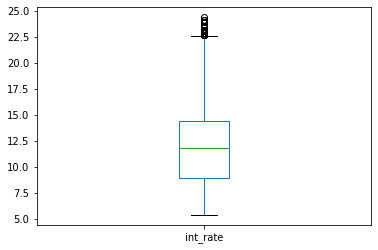

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
final_loan_df['int_rate'].plot.box()
plt.show()

### Since mean and median are nearly equal we are not removing any outliers

In [43]:
final_loan_df[final_loan_df['int_rate']>22.5].int_rate.shape[0]

65

In [44]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   term                  37544 non-null  object 
 2   int_rate              37544 non-null  float64
 3   grade                 37544 non-null  object 
 4   sub_grade             37544 non-null  object 
 5   emp_length            37544 non-null  object 
 6   home_ownership        37544 non-null  object 
 7   annual_inc            37544 non-null  float64
 8   verification_status   37544 non-null  object 
 9   issue_d               37544 non-null  object 
 10  loan_status           37544 non-null  object 
 11  purpose               37544 non-null  object 
 12  zip_code              37544 non-null  object 
 13  addr_state            37544 non-null  object 
 14  dti                   37544 non-null  float64
 15  pub_rec_bankruptcie

In [45]:
final_loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Removing the string year(s) and converting to float for the comparison with the assumpsion >1 year as 0.5 and 10+ as 11

In [46]:
final_loan_df['emp_length'] = final_loan_df['emp_length'].apply(lambda x : float(11) if x=='10+ years' else 0.5 if x=='< 1 year' else float(x.replace("year","").replace("s","")))

In [47]:
final_loan_df['emp_length'].value_counts()

11.0    8488
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [48]:
final_loan_df['emp_length'].describe()

count    37544.000000
mean         5.227094
std          3.810688
min          0.500000
25%          2.000000
50%          4.000000
75%          9.000000
max         11.000000
Name: emp_length, dtype: float64

In [49]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   term                  37544 non-null  object 
 2   int_rate              37544 non-null  float64
 3   grade                 37544 non-null  object 
 4   sub_grade             37544 non-null  object 
 5   emp_length            37544 non-null  float64
 6   home_ownership        37544 non-null  object 
 7   annual_inc            37544 non-null  float64
 8   verification_status   37544 non-null  object 
 9   issue_d               37544 non-null  object 
 10  loan_status           37544 non-null  object 
 11  purpose               37544 non-null  object 
 12  zip_code              37544 non-null  object 
 13  addr_state            37544 non-null  object 
 14  dti                   37544 non-null  float64
 15  pub_rec_bankruptcie

### Fixing Annual Income column

In [50]:
final_loan_df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

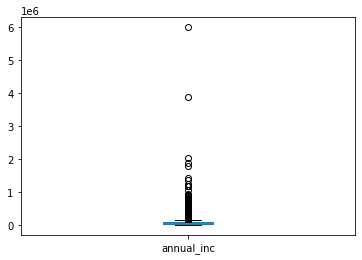

In [51]:
final_loan_df['annual_inc'].plot.box()
plt.show()

In [52]:
final_loan_df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [53]:
annual_inc_iqr = final_loan_df.annual_inc.quantile(0.75) - final_loan_df.annual_inc.quantile(0.25)
print(annual_inc_iqr)
annual_inc_upper_fence_limit = (final_loan_df.annual_inc.quantile(0.75)+ 1.5 * annual_inc_iqr)
annual_inc_lower_fence_limit = (final_loan_df.annual_inc.quantile(0.25) - 1.5 * annual_inc_iqr)
print(annual_inc_upper_fence_limit, annual_inc_lower_fence_limit)

42000.0
146000.0 -22000.0


In [54]:
final_loan_df.shape

(37544, 16)

### Removing the rows with annual_inc outliers

In [55]:
final_loan_df_2 = final_loan_df[~(final_loan_df['annual_inc']>annual_inc_upper_fence_limit)]

In [56]:
final_loan_df_2['annual_inc'].describe()

count     35814.000000
mean      61780.734054
std       28197.857345
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78688.000000
max      146000.000000
Name: annual_inc, dtype: float64

In [57]:
final_loan_df_2.shape

(35814, 16)

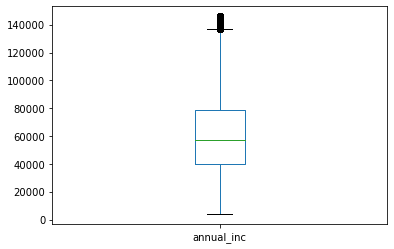

In [58]:
final_loan_df_2['annual_inc'].plot.box()
plt.show()

In [59]:
#Install plotly
!pip install plotly

In [60]:
final_loan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35814 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35814 non-null  int64  
 1   term                  35814 non-null  object 
 2   int_rate              35814 non-null  float64
 3   grade                 35814 non-null  object 
 4   sub_grade             35814 non-null  object 
 5   emp_length            35814 non-null  float64
 6   home_ownership        35814 non-null  object 
 7   annual_inc            35814 non-null  float64
 8   verification_status   35814 non-null  object 
 9   issue_d               35814 non-null  object 
 10  loan_status           35814 non-null  object 
 11  purpose               35814 non-null  object 
 12  zip_code              35814 non-null  object 
 13  addr_state            35814 non-null  object 
 14  dti                   35814 non-null  float64
 15  pub_rec_bankruptcie

### Fixing the term column as it has Leading spaces

In [61]:
final_loan_df_2['term'] = final_loan_df_2['term'].apply(lambda x: x.strip())

In [62]:
final_loan_df_2['term'].head(5)

0    36 months
1    60 months
2    36 months
3    36 months
5    36 months
Name: term, dtype: object

### Fixing the issue_d column as data dtype

In [63]:
final_loan_df_2['issue_d'] = pd.to_datetime(final_loan_df_2['issue_d'],format='%b-%y', yearfirst=False)

In [64]:
final_loan_df_2['issue_d'].shape[0]

35814

In [65]:
final_loan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35814 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             35814 non-null  int64         
 1   term                  35814 non-null  object        
 2   int_rate              35814 non-null  float64       
 3   grade                 35814 non-null  object        
 4   sub_grade             35814 non-null  object        
 5   emp_length            35814 non-null  float64       
 6   home_ownership        35814 non-null  object        
 7   annual_inc            35814 non-null  float64       
 8   verification_status   35814 non-null  object        
 9   issue_d               35814 non-null  datetime64[ns]
 10  loan_status           35814 non-null  object        
 11  purpose               35814 non-null  object        
 12  zip_code              35814 non-null  object        
 13  addr_state      

In [66]:
final_loan_df_2.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### Percentage of data dropped from the initial data set

In [67]:
100-((final_loan_df_2.shape[0]/loan_df.shape[0])*100)

9.827026210438845

## Univariate Analysis

### Creating new columns loan_month and loan_year from issue_d variable

In [68]:
final_loan_df_2['loan_month'] = final_loan_df_2['issue_d'].apply(lambda x: x.strftime("%b"))

In [69]:
final_loan_df_2['loan_year'] = final_loan_df_2['issue_d'].apply(lambda x: x.strftime("%Y"))

In [70]:
final_loan_df_2.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,loan_month,loan_year
0,5000,36 months,10.65,B,B2,11.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec,2011
1,2500,60 months,15.27,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,Dec,2011
2,2400,36 months,15.96,C,C5,11.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,Dec,2011
3,10000,36 months,13.49,C,C1,11.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,Dec,2011
5,5000,36 months,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,Dec,2011
6,7000,60 months,15.96,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,280xx,NC,23.51,0.0,Dec,2011
7,3000,36 months,18.64,E,E1,9.0,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,900xx,CA,5.35,0.0,Dec,2011
8,5600,60 months,21.28,F,F2,4.0,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,958xx,CA,5.55,0.0,Dec,2011
9,5375,60 months,12.69,B,B5,0.5,RENT,15000.0,Verified,2011-12-01,Charged Off,other,774xx,TX,18.08,0.0,Dec,2011
10,6500,60 months,14.65,C,C3,5.0,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,853xx,AZ,16.12,0.0,Dec,2011


In [71]:
final_loan_df_2['loan_month'].describe()

count     35814
unique       12
top         Dec
freq       3945
Name: loan_month, dtype: object

In [72]:
final_loan_df_2['loan_amnt'].describe()

count    35814.000000
mean     10775.740632
std       7075.678330
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

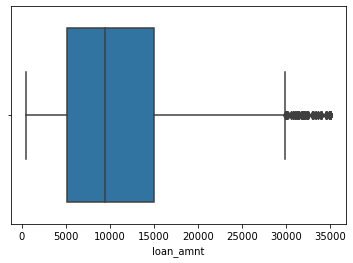

In [73]:
sns.boxplot(final_loan_df_2['loan_amnt'])
plt.show()

In [74]:
final_loan_df_2['term'].value_counts()

36 months    27053
60 months     8761
Name: term, dtype: int64

In [75]:
final_loan_df_2['grade'].value_counts()

B    10842
A     9309
C     7345
D     4755
E     2424
F      873
G      266
Name: grade, dtype: int64

In [76]:
final_loan_df_2['sub_grade'].value_counts()

A4    2680
B3    2597
A5    2537
B5    2449
B4    2296
C1    1931
B2    1851
C2    1820
A3    1687
B1    1649
C3    1392
A2    1391
D2    1197
C4    1128
C5    1074
D3    1048
A1    1014
D1     878
D4     859
D5     773
E1     669
E2     561
E3     463
E4     391
E5     340
F1     272
F2     212
F3     155
F4     137
F5      97
G1      88
G2      69
G4      45
G3      41
G5      23
Name: sub_grade, dtype: int64

In [77]:
final_loan_df_2['emp_length'].value_counts()

11.0    7939
0.5     4352
2.0     4120
3.0     3842
4.0     3213
5.0     3059
1.0     3056
6.0     2081
7.0     1647
8.0     1348
9.0     1157
Name: emp_length, dtype: int64

In [78]:
final_loan_df_2['home_ownership'].value_counts()
# We can merge the categories with mode (i.e. RENT)

RENT        17666
MORTGAGE    15393
OWN          2659
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [79]:
final_loan_df_2['home_ownership'] = final_loan_df_2['home_ownership'].replace({'NONE' : 'RENT'})
final_loan_df_2['home_ownership'].value_counts()

RENT        17669
MORTGAGE    15393
OWN          2659
OTHER          93
Name: home_ownership, dtype: int64

In [80]:
final_loan_df_2['annual_inc'].describe()

count     35814.000000
mean      61780.734054
std       28197.857345
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78688.000000
max      146000.000000
Name: annual_inc, dtype: float64

In [81]:
final_loan_df_2['verification_status'].value_counts()

Not Verified       15910
Verified           10882
Source Verified     9022
Name: verification_status, dtype: int64

In [82]:
final_loan_df_2['purpose'].value_counts()

debt_consolidation    17007
credit_card            4681
other                  3561
home_improvement       2496
major_purchase         1984
small_business         1588
car                    1406
wedding                 885
medical                 621
moving                  528
vacation                339
house                   325
educational             306
renewable_energy         87
Name: purpose, dtype: int64

In [83]:
final_loan_df_2['zip_code'].value_counts()

100xx    487
945xx    486
112xx    480
606xx    468
070xx    423
        ... 
090xx      1
372xx      1
388xx      1
833xx      1
397xx      1
Name: zip_code, Length: 818, dtype: int64

In [84]:
final_loan_df_2['addr_state'].value_counts()

CA    6414
NY    3377
FL    2581
TX    2439
NJ    1658
PA    1395
IL    1375
VA    1287
GA    1260
MA    1189
OH    1119
MD     957
AZ     773
WA     753
CO     722
NC     697
CT     661
MI     653
MO     629
MN     568
NV     445
SC     433
OR     414
WI     412
AL     406
LA     393
KY     300
OK     277
UT     237
KS     235
AR     221
DC     199
RI     185
NM     174
WV     162
HI     157
NH     151
DE     106
MT      77
WY      76
AK      69
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [85]:
final_loan_df_2['dti'].describe()

count    35814.000000
mean        13.450703
std          6.647476
min          0.000000
25%          8.370000
50%         13.580000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

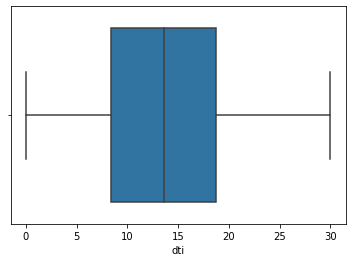

In [86]:
sns.boxplot(final_loan_df_2['dti'])
plt.show()

In [87]:
final_loan_df_2['pub_rec_bankruptcies'].value_counts()

0.0    34312
1.0     1497
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [88]:
final_loan_df_2.head(5)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,loan_month,loan_year
0,5000,36 months,10.65,B,B2,11.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec,2011
1,2500,60 months,15.27,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,Dec,2011
2,2400,36 months,15.96,C,C5,11.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,Dec,2011
3,10000,36 months,13.49,C,C1,11.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,Dec,2011
5,5000,36 months,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,Dec,2011


In [89]:
final_loan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35814 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             35814 non-null  int64         
 1   term                  35814 non-null  object        
 2   int_rate              35814 non-null  float64       
 3   grade                 35814 non-null  object        
 4   sub_grade             35814 non-null  object        
 5   emp_length            35814 non-null  float64       
 6   home_ownership        35814 non-null  object        
 7   annual_inc            35814 non-null  float64       
 8   verification_status   35814 non-null  object        
 9   issue_d               35814 non-null  datetime64[ns]
 10  loan_status           35814 non-null  object        
 11  purpose               35814 non-null  object        
 12  zip_code              35814 non-null  object        
 13  addr_state      

## Creating Derived metrices

In [90]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
category = ['Below 5000', '5000 to 10000', '10000 to 15000', '15000 to 20000', '20000 to 25000','above 25000']
final_loan_df_2['loan_amnt_category'] = pd.cut(final_loan_df_2['loan_amnt'], bins, labels= category)
final_loan_df_2['loan_amnt_category'].value_counts()

5000 to 10000     12123
Below 5000         8927
10000 to 15000     7230
15000 to 20000     4004
20000 to 25000     2410
above 25000        1120
Name: loan_amnt_category, dtype: int64

In [91]:
bins = list(range(0, 160000, 10000))
category = ['Below 10000', '10001 to 20000', '20001 to 30000', '30001 to 40000', '40001 to 50000', '50001 to 60000', '60001 to 70000', '70001 to 80000', '80001 to 90000', '90001 to 100000', '100001 to 110000', '110001 to 120000', '120001 to 130000', '130001 to 140000','above 140000']
final_loan_df_2['annual_inc_category'] = pd.cut(final_loan_df_2['annual_inc'], bins, labels= category)
final_loan_df_2['annual_inc_category'].value_counts()

40001 to 50000      5539
50001 to 60000      5462
30001 to 40000      4956
60001 to 70000      4026
70001 to 80000      3479
20001 to 30000      3174
80001 to 90000      2478
90001 to 100000     1988
100001 to 110000    1215
110001 to 120000    1091
10001 to 20000       934
120001 to 130000     726
130001 to 140000     485
above 140000         186
Below 10000           75
Name: annual_inc_category, dtype: int64

In [92]:
bins = list(range(0,31,5))
category = ['Below 5', '6 to 10', '11 to 15', '16 to 20', '21 to 25','above 25']
final_loan_df_2['dti_category'] = pd.cut(final_loan_df_2['dti'], bins, labels= category)
final_loan_df_2['dti_category'].value_counts()

11 to 15    8991
16 to 20    8353
6 to 10     7096
21 to 25    6296
Below 5     4328
above 25     590
Name: dti_category, dtype: int64

In [93]:
# Creating int_rate_category column to bucket the interest rate

bins = list(range(5,30,5))
category = ['Below 10', '10 to 15', '15 to 20', 'above 20']
final_loan_df_2['int_rate_category'] = pd.cut(final_loan_df_2['int_rate'], bins, labels= category)
final_loan_df_2['int_rate_category'].value_counts()

10 to 15    17084
Below 10    11395
15 to 20     6664
above 20      671
Name: int_rate_category, dtype: int64

In [94]:
final_loan_df_2['dti_category']= final_loan_df_2['dti_category'].fillna('Below 5')
final_loan_df_2['dti_category'].value_counts()

11 to 15    8991
16 to 20    8353
6 to 10     7096
21 to 25    6296
Below 5     4488
above 25     590
Name: dti_category, dtype: int64

In [95]:
final_loan_df_2['loan_month'].value_counts()

Dec    3945
Nov    3722
Oct    3431
Sep    3199
Aug    3165
Jul    3118
Jun    2945
May    2721
Apr    2647
Mar    2509
Jan    2228
Feb    2184
Name: loan_month, dtype: int64

In [96]:
final_loan_df_2['loan_year'].value_counts()

2011    18840
2010    10748
2009     4500
2008     1495
2007      231
Name: loan_year, dtype: int64

## Creating functions for numerical and Categorical univariate analysis plots

In [97]:
def univariate_numeric(df,col):
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(15,7))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    plt.show()


def univariate_categorical(df,col,hue =None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, palette="ch:.25", y= col, order=df[col].value_counts().index,hue = hue, orient = 'h') 
    plt.show()
    print(df[col].value_counts())

### 1. Univariate analysis - Numeric variables


1.01  loan_amnt -  Exploratory analysis


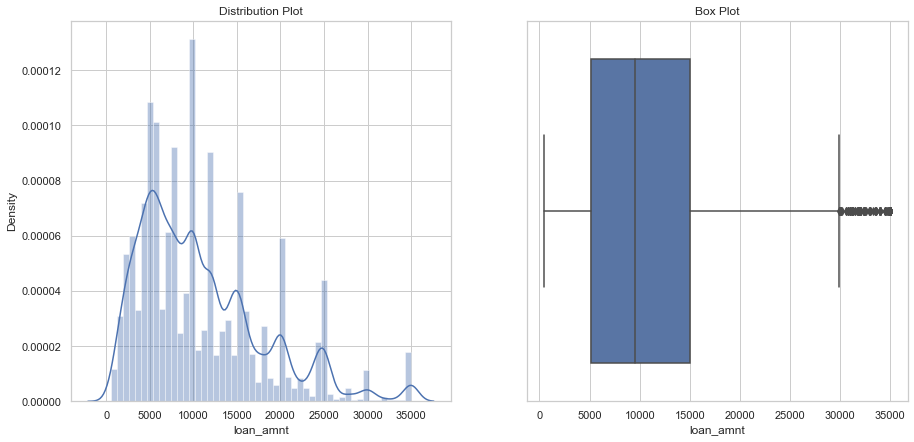


1.02  int_rate -  Exploratory analysis


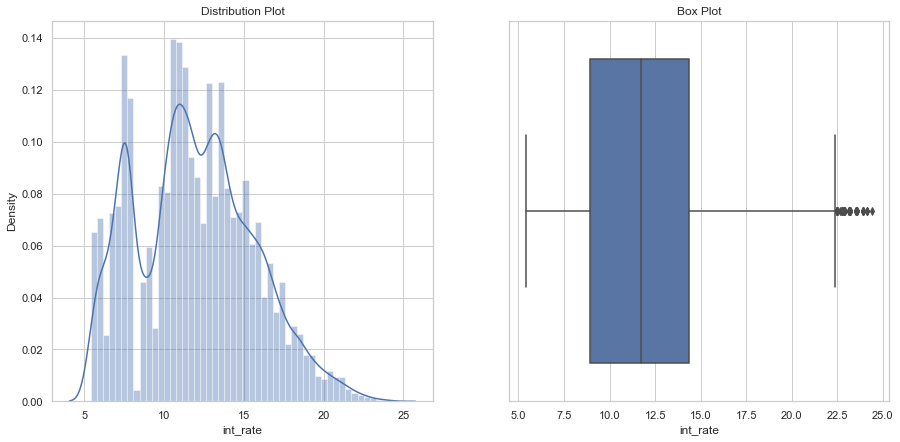


1.03  emp_length -  Exploratory analysis


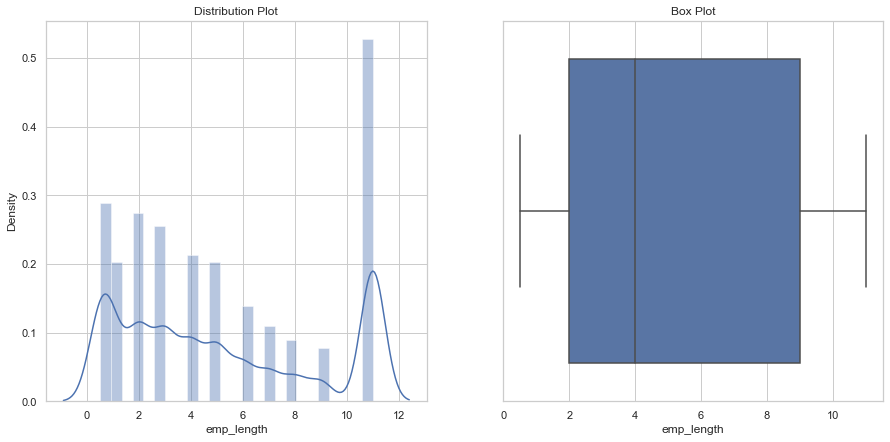


1.04  annual_inc -  Exploratory analysis


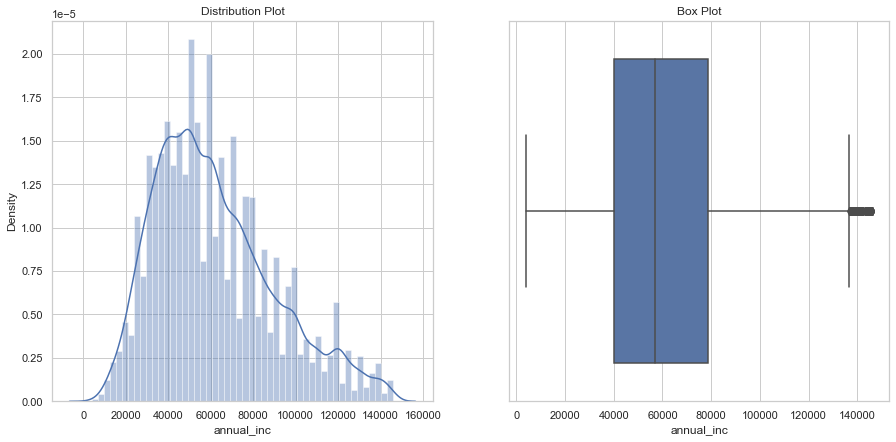


1.05  dti -  Exploratory analysis


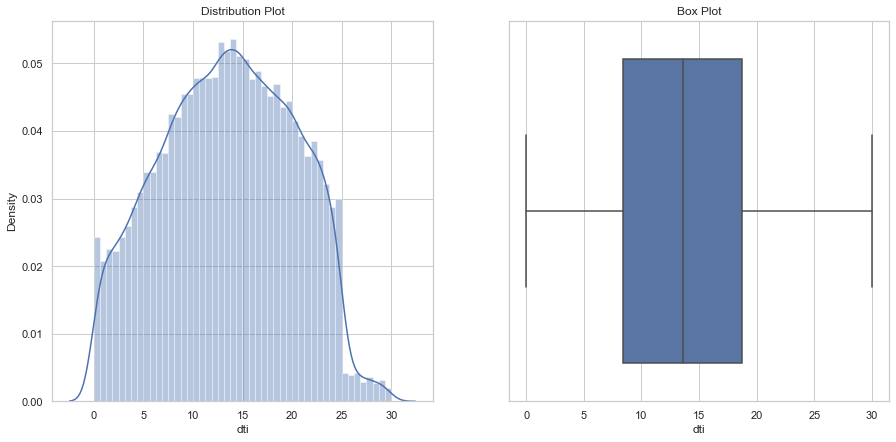


1.06  pub_rec_bankruptcies -  Exploratory analysis


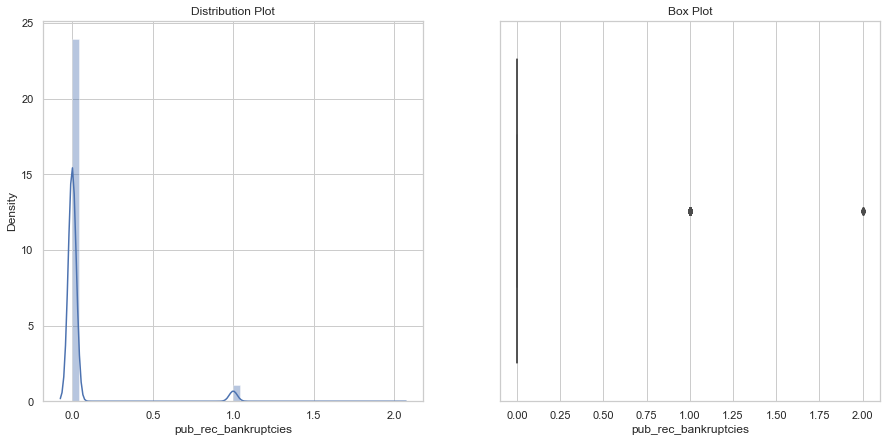

In [98]:
i= float(1.01)
for column in final_loan_df_2.select_dtypes(include=['int64','float64']).columns:
    print("\n" + str(i) + "  " + column + " -  Exploratory analysis")
    univariate_numeric(final_loan_df_2, col = column)
    i = i + 0.01

### Insights from above plots -

1. Majority of the loans had amount of less than 15000 USD
2. Interest rate was between 10 to 15% for most of the loans
3. Debt to Income ratio is about 15
4. Annual income is mostly between 40000 to 80000 USD

### 2. Univariate Analysis - Categorical Variables


2.1  term -  Exploratory analysis


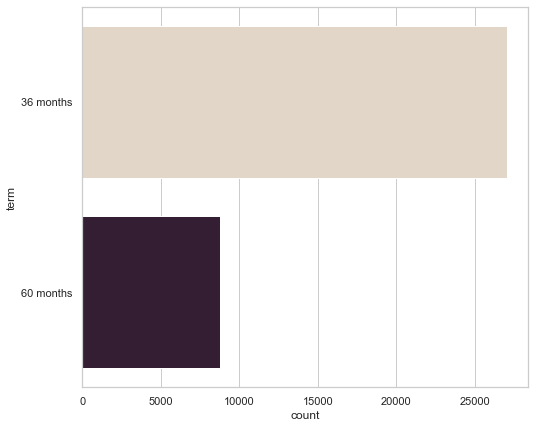

36 months    27053
60 months     8761
Name: term, dtype: int64

2.2  grade -  Exploratory analysis


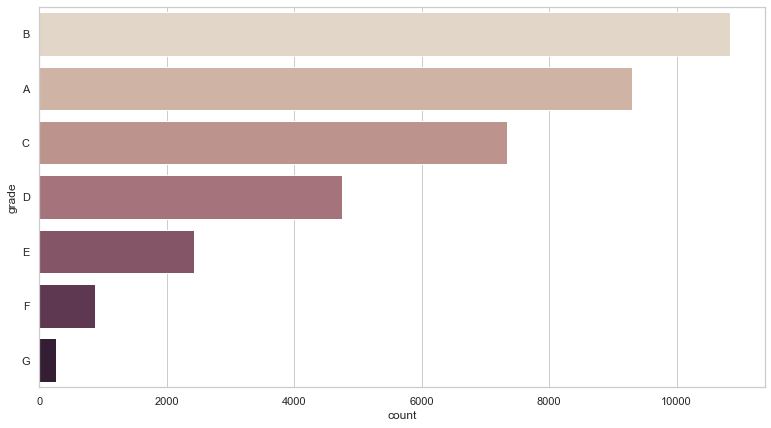

B    10842
A     9309
C     7345
D     4755
E     2424
F      873
G      266
Name: grade, dtype: int64

2.3  sub_grade -  Exploratory analysis


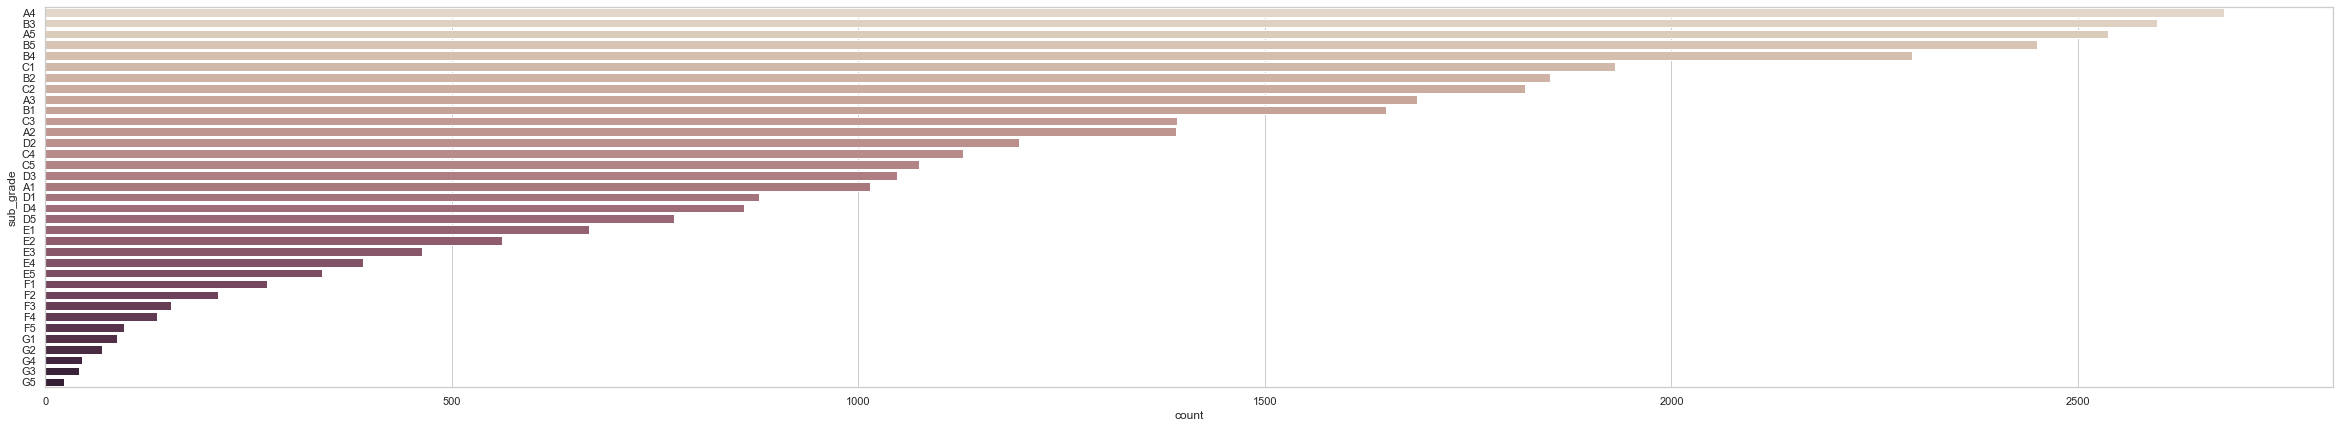

A4    2680
B3    2597
A5    2537
B5    2449
B4    2296
C1    1931
B2    1851
C2    1820
A3    1687
B1    1649
C3    1392
A2    1391
D2    1197
C4    1128
C5    1074
D3    1048
A1    1014
D1     878
D4     859
D5     773
E1     669
E2     561
E3     463
E4     391
E5     340
F1     272
F2     212
F3     155
F4     137
F5      97
G1      88
G2      69
G4      45
G3      41
G5      23
Name: sub_grade, dtype: int64

2.4  home_ownership -  Exploratory analysis


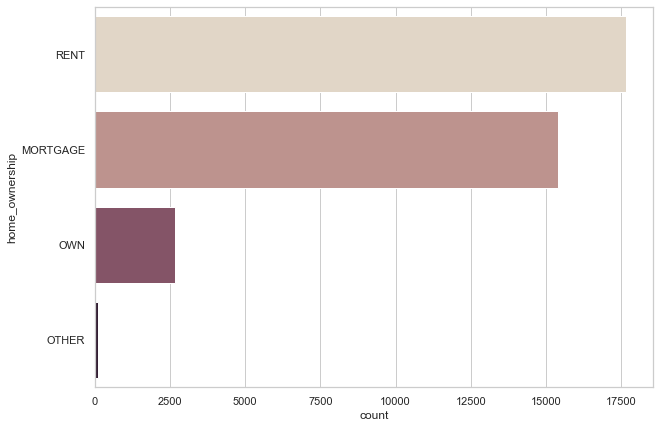

RENT        17669
MORTGAGE    15393
OWN          2659
OTHER          93
Name: home_ownership, dtype: int64

2.5  verification_status -  Exploratory analysis


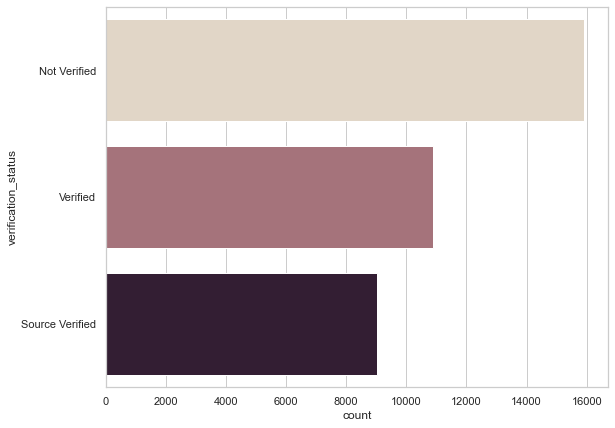

Not Verified       15910
Verified           10882
Source Verified     9022
Name: verification_status, dtype: int64

2.6  loan_status -  Exploratory analysis


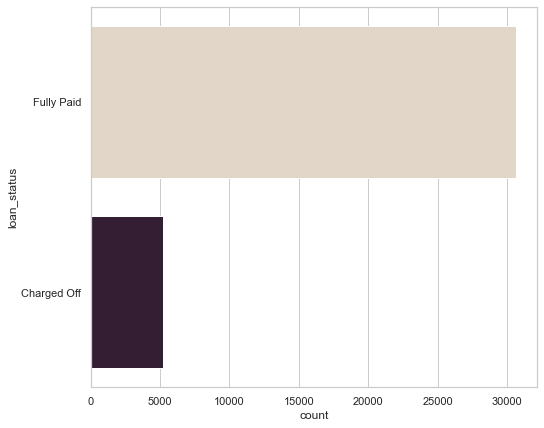

Fully Paid     30607
Charged Off     5207
Name: loan_status, dtype: int64

2.7  purpose -  Exploratory analysis


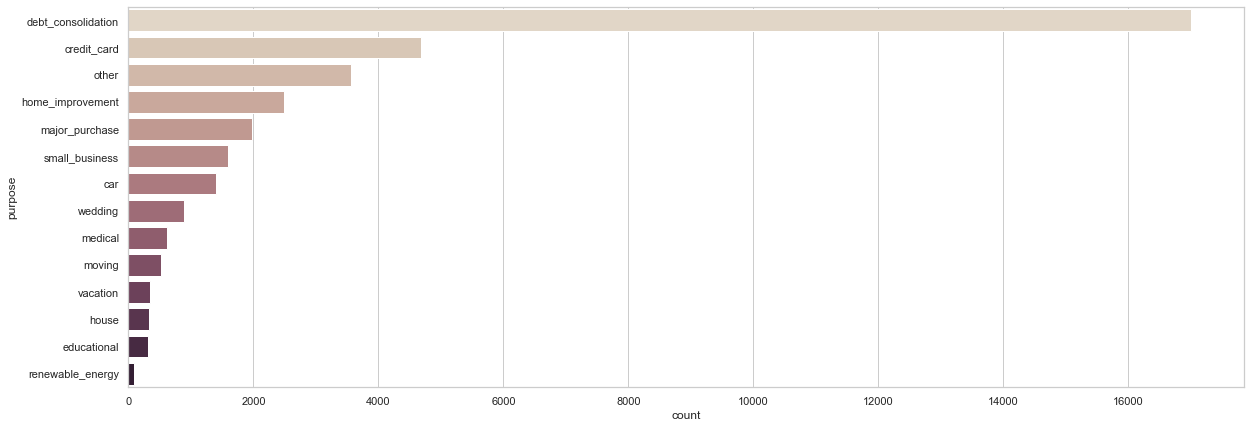

debt_consolidation    17007
credit_card            4681
other                  3561
home_improvement       2496
major_purchase         1984
small_business         1588
car                    1406
wedding                 885
medical                 621
moving                  528
vacation                339
house                   325
educational             306
renewable_energy         87
Name: purpose, dtype: int64

2.8  zip_code -  Exploratory analysis


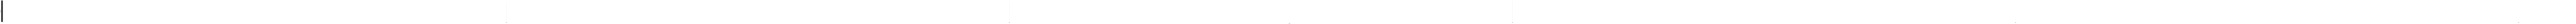

100xx    487
945xx    486
112xx    480
606xx    468
070xx    423
        ... 
090xx      1
372xx      1
388xx      1
833xx      1
397xx      1
Name: zip_code, Length: 818, dtype: int64

2.9  addr_state -  Exploratory analysis


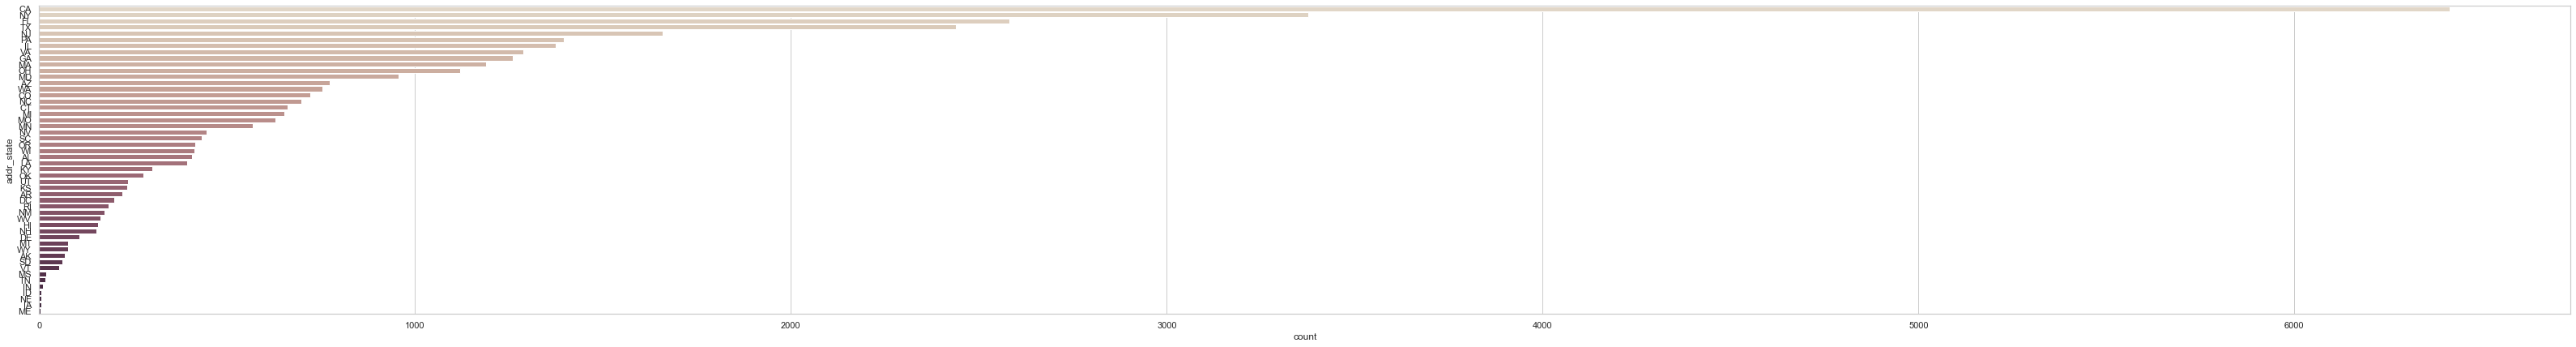

CA    6414
NY    3377
FL    2581
TX    2439
NJ    1658
PA    1395
IL    1375
VA    1287
GA    1260
MA    1189
OH    1119
MD     957
AZ     773
WA     753
CO     722
NC     697
CT     661
MI     653
MO     629
MN     568
NV     445
SC     433
OR     414
WI     412
AL     406
LA     393
KY     300
OK     277
UT     237
KS     235
AR     221
DC     199
RI     185
NM     174
WV     162
HI     157
NH     151
DE     106
MT      77
WY      76
AK      69
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

3.0  loan_month -  Exploratory analysis


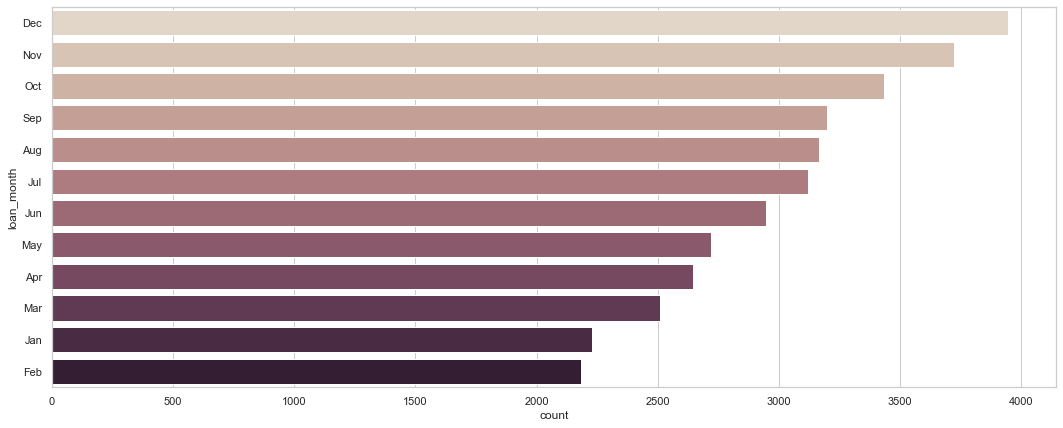

Dec    3945
Nov    3722
Oct    3431
Sep    3199
Aug    3165
Jul    3118
Jun    2945
May    2721
Apr    2647
Mar    2509
Jan    2228
Feb    2184
Name: loan_month, dtype: int64

3.1  loan_year -  Exploratory analysis


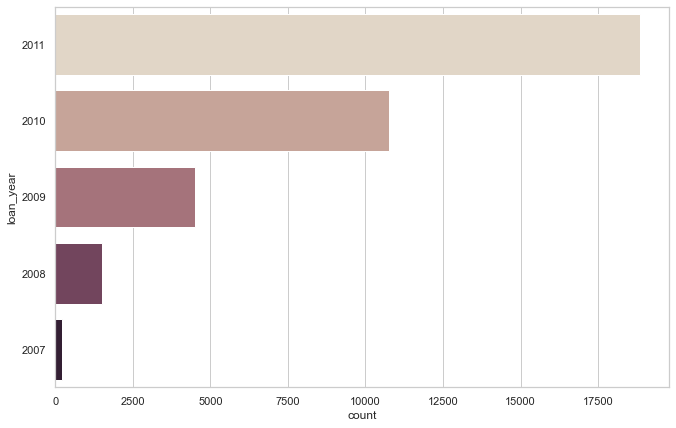

2011    18840
2010    10748
2009     4500
2008     1495
2007      231
Name: loan_year, dtype: int64

3.2  loan_amnt_category -  Exploratory analysis


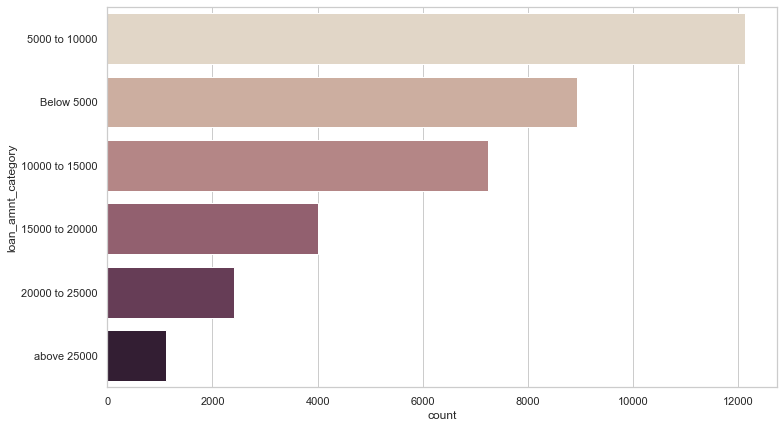

5000 to 10000     12123
Below 5000         8927
10000 to 15000     7230
15000 to 20000     4004
20000 to 25000     2410
above 25000        1120
Name: loan_amnt_category, dtype: int64

3.3  annual_inc_category -  Exploratory analysis


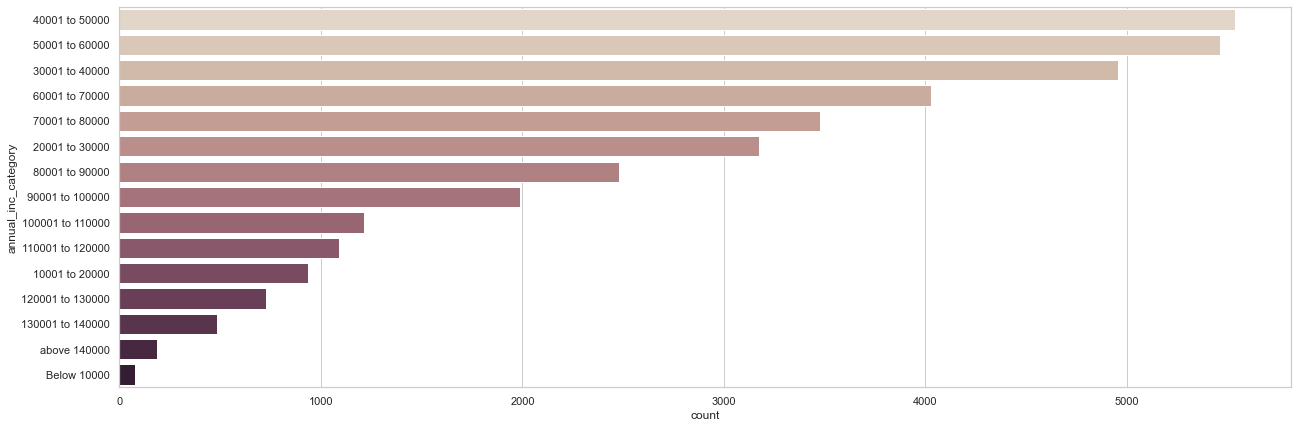

40001 to 50000      5539
50001 to 60000      5462
30001 to 40000      4956
60001 to 70000      4026
70001 to 80000      3479
20001 to 30000      3174
80001 to 90000      2478
90001 to 100000     1988
100001 to 110000    1215
110001 to 120000    1091
10001 to 20000       934
120001 to 130000     726
130001 to 140000     485
above 140000         186
Below 10000           75
Name: annual_inc_category, dtype: int64

3.4  dti_category -  Exploratory analysis


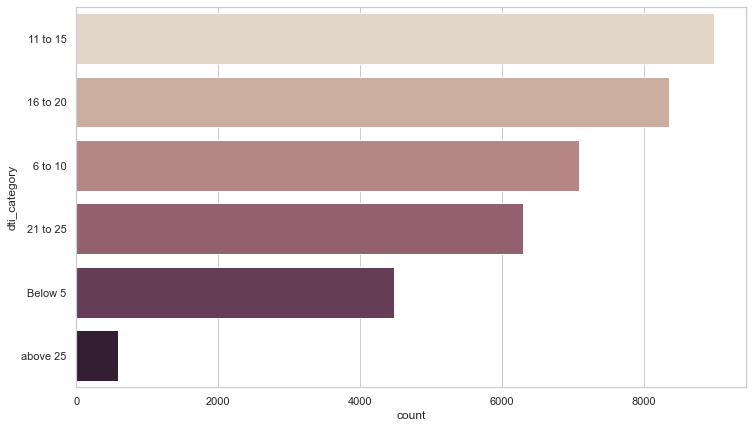

11 to 15    8991
16 to 20    8353
6 to 10     7096
21 to 25    6296
Below 5     4488
above 25     590
Name: dti_category, dtype: int64

3.5  int_rate_category -  Exploratory analysis


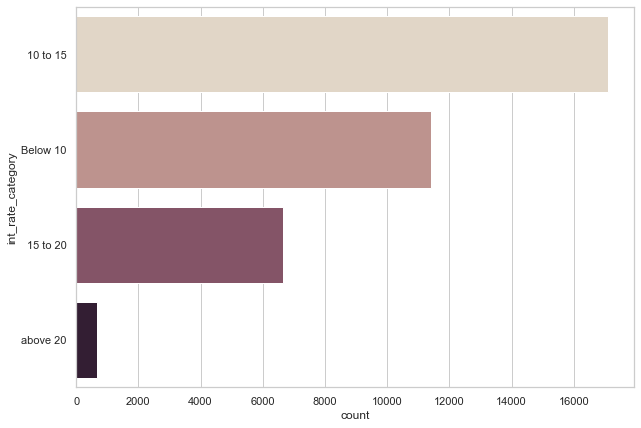

10 to 15    17084
Below 10    11395
15 to 20     6664
above 20      671
Name: int_rate_category, dtype: int64


In [99]:
i = 2.1
for column in final_loan_df_2.select_dtypes(include=['object','category']).columns:
    print("\n" + str(i) + "  " + column + " -  Exploratory analysis")
    univariate_categorical(final_loan_df_2, col = column)
    i = round(i + 0.1,1)

### Insights from above plots -

1. Majority of the loans were short-term (36 months)
2. Grade was A or B for most of the loans
3. Majority of customers stay in rent or mortgage house
4. Out of all the 35814 loans, 14.53% loan cases were charged-off !
5. More than 50% loans are offered in 2011.
6. Most of the loan opted for debt consolidation in the data set.
7. Most of the loan applicants are with 10+ years of experience.


## Segmented Univariate Analysis

### Creating function to plot Percentage of Charged-off in Different Categorical variables

In [100]:
def charged_off_calculation(df,col,rotation = 0, figsize= (8,6)):
    temp = pd.crosstab(df[col], df['loan_status'],margins=True)
    temp['Charged_Off_Percent'] = round((temp['Charged Off']/temp['All'])*100,2)
    temp = temp[0:-1]
    sns.set(style="whitegrid")
    sns.barplot(x=temp.index, y='Charged_Off_Percent', data = temp,palette="pastel")
    plt.rcParams['figure.figsize']=figsize
    plt.xticks(rotation = rotation)
    plt.show()
    return temp

# We created a function which will calculate the percentage of loans that were charged-off for each category



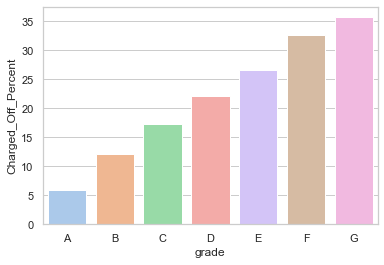

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
grade,,,,
A,550,8759,9309,5.91
B,1311,9531,10842,12.09
C,1267,6078,7345,17.25
D,1052,3703,4755,22.12
E,647,1777,2424,26.69
F,285,588,873,32.65
G,95,171,266,35.71


In [101]:
charged_off_calculation(final_loan_df_2, 'grade')

In [102]:
### Grade A is least likely to charge-off (5.91%) and probability of default increases linearly with worsening grade.

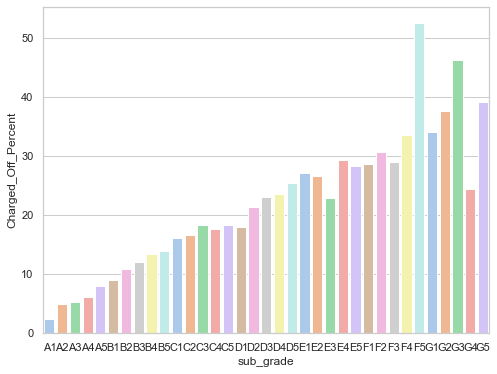

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
sub_grade,,,,
A1,24,990,1014,2.37
A2,68,1323,1391,4.89
A3,90,1597,1687,5.33
A4,163,2517,2680,6.08
A5,205,2332,2537,8.08
B1,149,1500,1649,9.04
B2,200,1651,1851,10.80
B3,312,2285,2597,12.01
B4,309,1987,2296,13.46


In [103]:
charged_off_calculation(final_loan_df_2, 'sub_grade', figsize=(15,9))

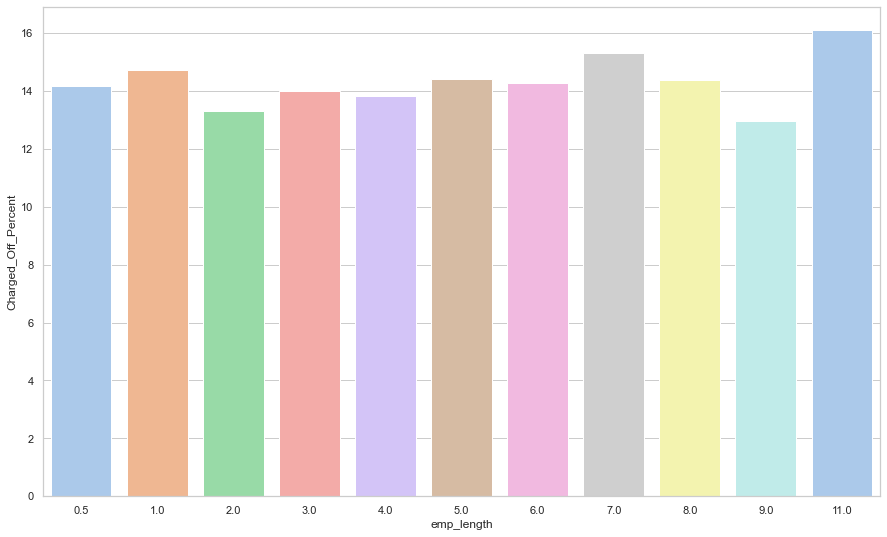

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
emp_length,,,,
0.5,617,3735,4352,14.18
1.0,450,2606,3056,14.73
2.0,548,3572,4120,13.30
3.0,537,3305,3842,13.98
4.0,444,2769,3213,13.82
5.0,441,2618,3059,14.42
6.0,297,1784,2081,14.27
7.0,252,1395,1647,15.30
8.0,194,1154,1348,14.39


In [104]:
charged_off_calculation(final_loan_df_2, 'emp_length', figsize=(15,9))

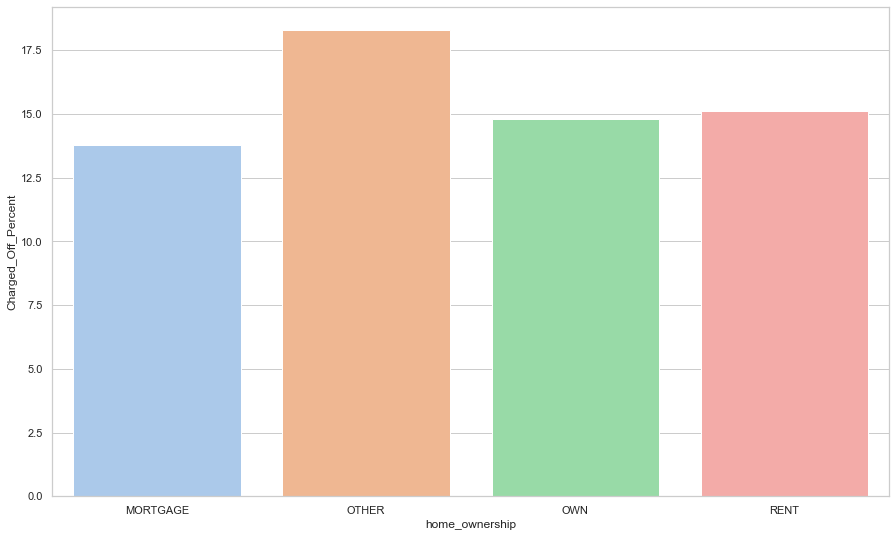

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
home_ownership,,,,
MORTGAGE,2124,13269,15393,13.80
OTHER,17,76,93,18.28
OWN,394,2265,2659,14.82
RENT,2672,14997,17669,15.12


In [105]:
charged_off_calculation(final_loan_df_2, 'home_ownership', figsize=(12,9))

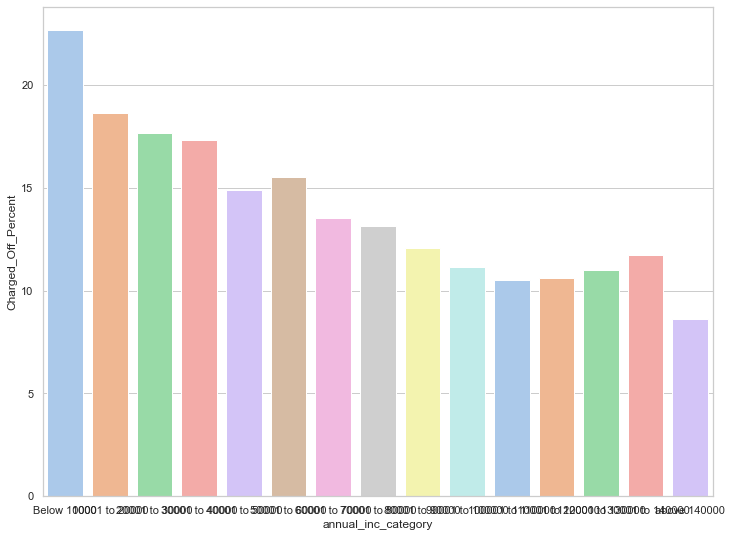

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
annual_inc_category,,,,
Below 10000,17,58,75,22.67
10001 to 20000,174,760,934,18.63
20001 to 30000,561,2613,3174,17.67
30001 to 40000,860,4096,4956,17.35
40001 to 50000,826,4713,5539,14.91
50001 to 60000,849,4613,5462,15.54
60001 to 70000,545,3481,4026,13.54
70001 to 80000,457,3022,3479,13.14
80001 to 90000,299,2179,2478,12.07


In [106]:
charged_off_calculation(final_loan_df_2, 'annual_inc_category', figsize=(15,9))

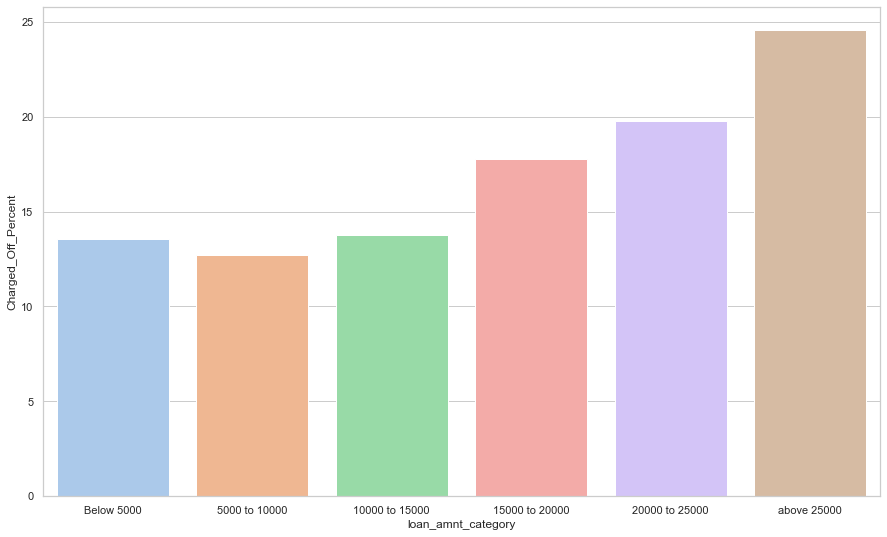

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
loan_amnt_category,,,,
Below 5000,1208,7719,8927,13.53
5000 to 10000,1542,10581,12123,12.72
10000 to 15000,994,6236,7230,13.75
15000 to 20000,711,3293,4004,17.76
20000 to 25000,477,1933,2410,19.79
above 25000,275,845,1120,24.55


In [107]:
charged_off_calculation(final_loan_df_2, 'loan_amnt_category', figsize=(12,7))

In [108]:
### Loan amount above 25000 is more likely to default (24.55%)

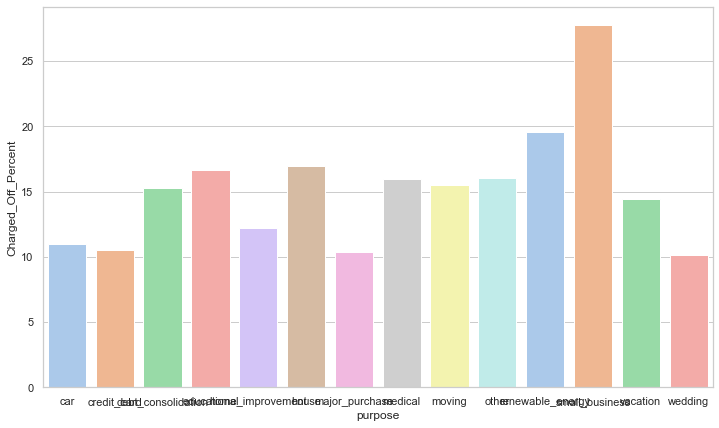

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
purpose,,,,
car,154,1252,1406,10.95
credit_card,491,4190,4681,10.49
debt_consolidation,2597,14410,17007,15.27
educational,51,255,306,16.67
home_improvement,305,2191,2496,12.22
house,55,270,325,16.92
major_purchase,206,1778,1984,10.38
medical,99,522,621,15.94
moving,82,446,528,15.53


In [109]:
charged_off_calculation(final_loan_df_2, 'purpose', figsize=(15,9))

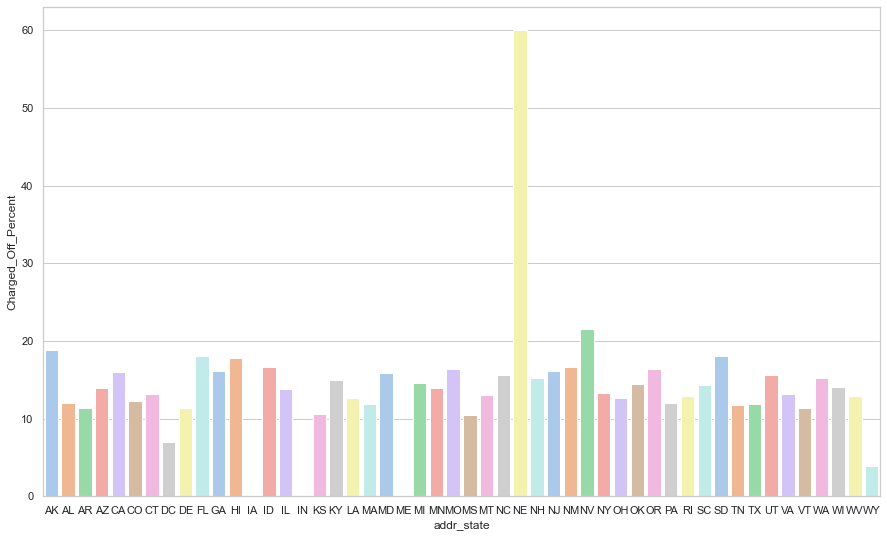

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
addr_state,,,,
AK,13,56,69,18.84
AL,49,357,406,12.07
AR,25,196,221,11.31
AZ,108,665,773,13.97
CA,1027,5387,6414,16.01
CO,89,633,722,12.33
CT,87,574,661,13.16
DC,14,185,199,7.04
DE,12,94,106,11.32


In [110]:
charged_off_calculation(final_loan_df_2, 'addr_state', figsize=(15,7))

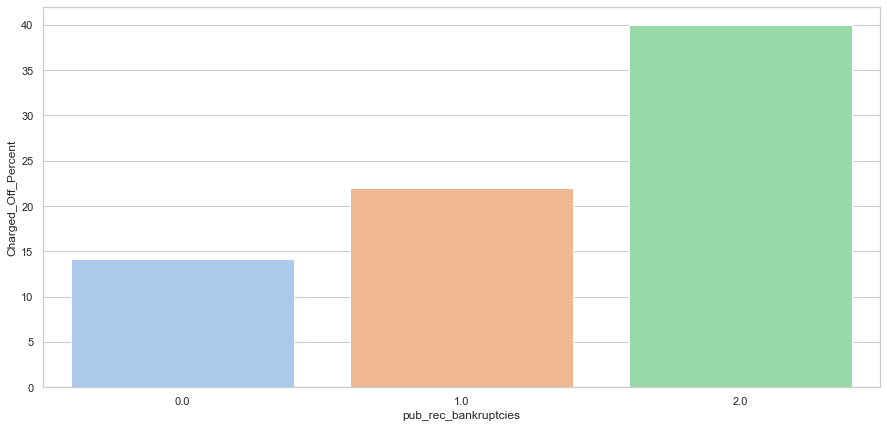

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
pub_rec_bankruptcies,,,,
0.0,4875,29437,34312,14.21
1.0,330,1167,1497,22.04
2.0,2,3,5,40.00


In [111]:
charged_off_calculation(final_loan_df_2, 'pub_rec_bankruptcies', figsize=(12,7))

In [112]:
### Presence of public record bankruptcy is more likely to default

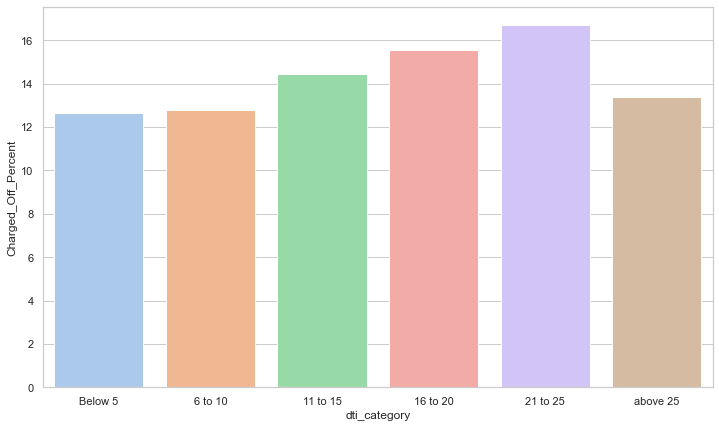

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
dti_category,,,,
Below 5,568,3920,4488,12.66
6 to 10,908,6188,7096,12.80
11 to 15,1300,7691,8991,14.46
16 to 20,1300,7053,8353,15.56
21 to 25,1052,5244,6296,16.71
above 25,79,511,590,13.39


In [113]:
charged_off_calculation(final_loan_df_2, 'dti_category', figsize=(12,7))

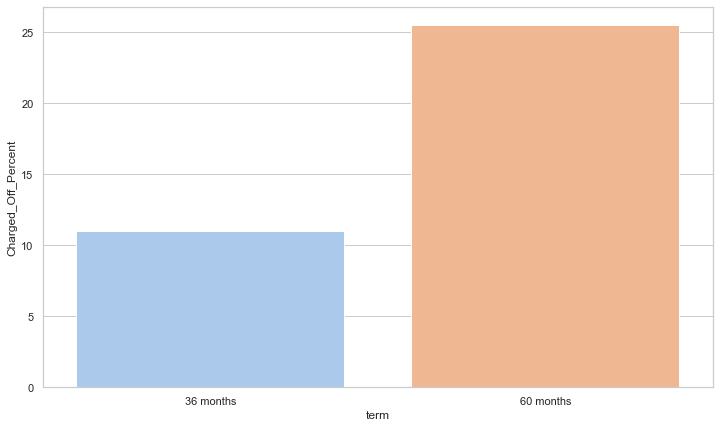

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
term,,,,
36 months,2970,24083,27053,10.98
60 months,2237,6524,8761,25.53


In [114]:
charged_off_calculation(final_loan_df_2, 'term', figsize=(15,7))

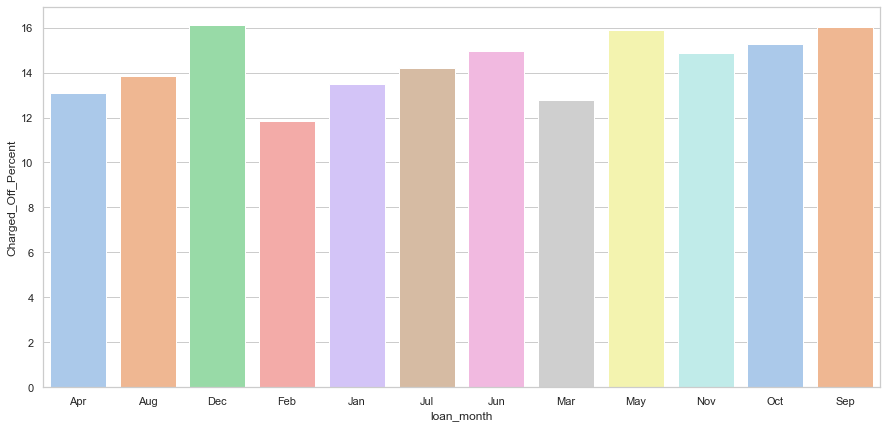

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
loan_month,,,,
Apr,346,2301,2647,13.07
Aug,438,2727,3165,13.84
Dec,636,3309,3945,16.12
Feb,259,1925,2184,11.86
Jan,301,1927,2228,13.51
Jul,443,2675,3118,14.21
Jun,440,2505,2945,14.94
Mar,321,2188,2509,12.79
May,433,2288,2721,15.91


In [115]:
charged_off_calculation(final_loan_df_2, 'loan_month', figsize=(15,7))

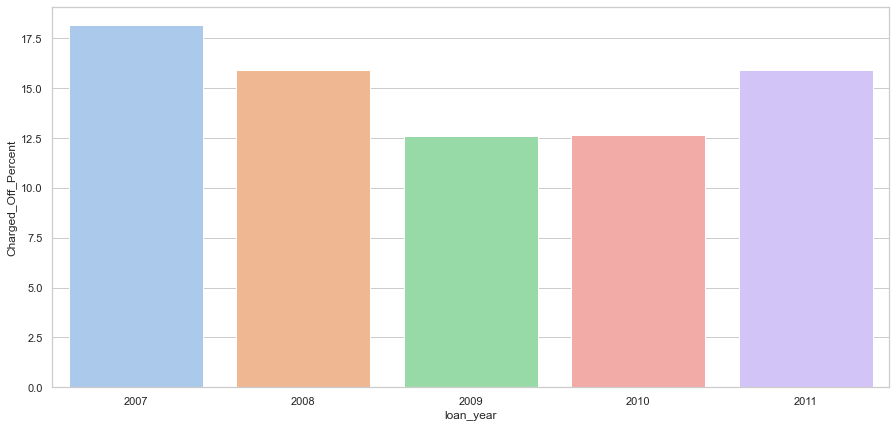

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
loan_year,,,,
2007,42,189,231,18.18
2008,238,1257,1495,15.92
2009,568,3932,4500,12.62
2010,1359,9389,10748,12.64
2011,3000,15840,18840,15.92


In [116]:
charged_off_calculation(final_loan_df_2, 'loan_year', figsize=(15,7))

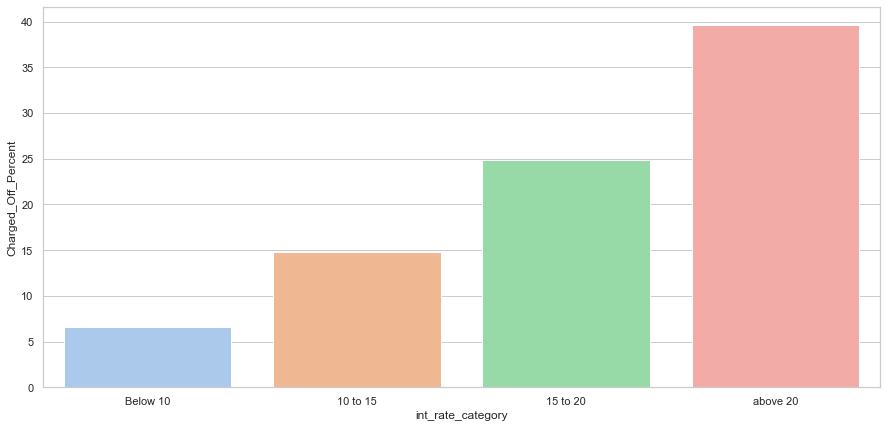

loan_status,Charged Off,Fully Paid,All,Charged_Off_Percent
int_rate_category,,,,
Below 10,746,10649,11395,6.55
10 to 15,2535,14549,17084,14.84
15 to 20,1660,5004,6664,24.91
above 20,266,405,671,39.64


In [117]:
charged_off_calculation(final_loan_df_2, 'int_rate_category', figsize=(15,7))

## Multivariate Analysis

In [118]:
def multivariate_numeric(df,col,groupby,hue= None):
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =2,ncols=1,figsize=(10,10))
    ax[0].set_title("Box Plot")
    sns.boxplot(x=groupby, y=col,palette="pastel", data= df,hue=hue, ax=ax[0])
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax[1].set_title("")
    sns.boxplot(x=groupby, y=col, data= df, ax=ax[1])
    plt.show()

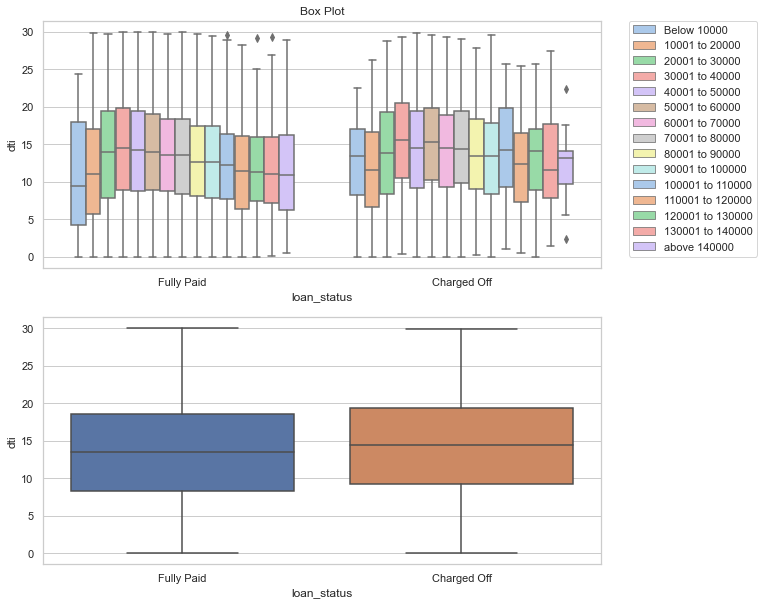

In [119]:
multivariate_numeric(final_loan_df_2, col ='dti', groupby = 'loan_status', hue = 'annual_inc_category')

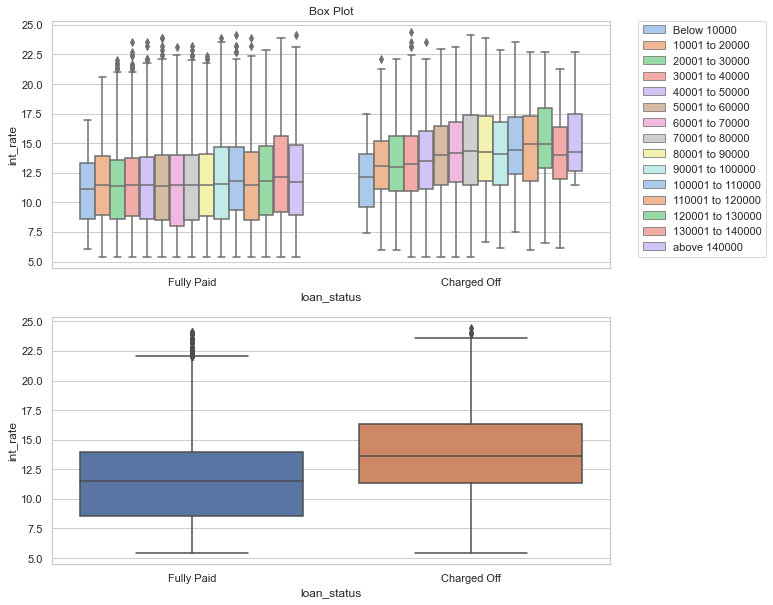

In [120]:
multivariate_numeric(final_loan_df_2, col ='int_rate', groupby = 'loan_status', hue = 'annual_inc_category')

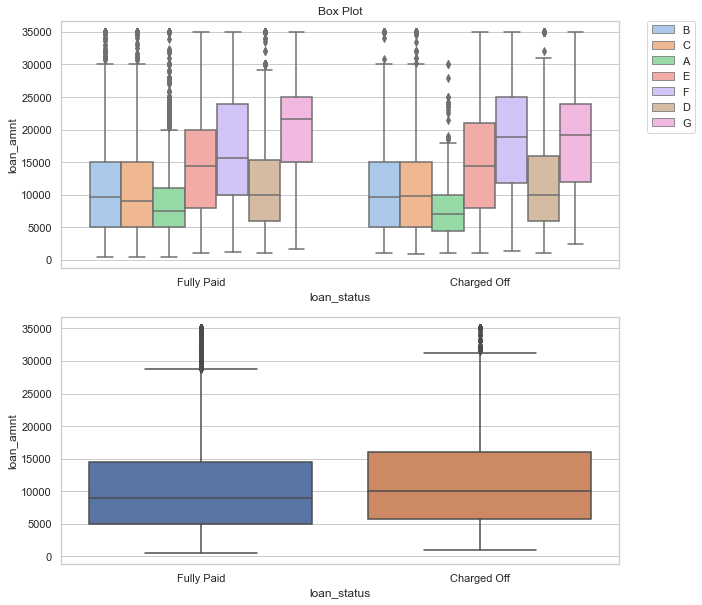

In [121]:
multivariate_numeric(final_loan_df_2, col ='loan_amnt', groupby = 'loan_status', hue = 'grade')

## Correlation

In [122]:
df_numeric = final_loan_df_2.select_dtypes(include=['int64','float64'])
correlation = df_numeric.corr()
correlation

,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.000000,0.289618,0.150523,0.399809,0.088896,-0.024760
int_rate,0.289618,1.000000,-0.001889,0.049623,0.113180,0.088027
emp_length,0.150523,-0.001889,1.000000,0.193713,0.056052,0.067589
annual_inc,0.399809,0.049623,0.193713,1.000000,-0.079597,0.001284
dti,0.088896,0.113180,0.056052,-0.079597,1.000000,0.006415
pub_rec_bankruptcies,-0.024760,0.088027,0.067589,0.001284,0.006415,1.000000


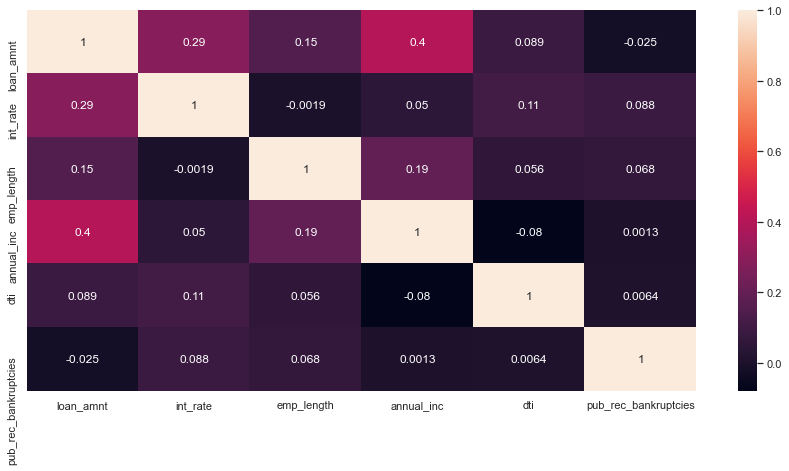

In [123]:
sns.heatmap(correlation,
           xticklabels = correlation.columns.values,
           yticklabels= correlation.columns.values,annot= True)
plt.show()

### Multivariate Analysis

#### Creating charged_off_status column for analysing the effect of combined categories on charge off loan status

In [124]:
final_loan_df_2['charged_off_status'] = final_loan_df_2['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
final_loan_df_2[final_loan_df_2['charged_off_status'] == 1].charged_off_status.sum()

5207

In [125]:
final_loan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35814 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             35814 non-null  int64         
 1   term                  35814 non-null  object        
 2   int_rate              35814 non-null  float64       
 3   grade                 35814 non-null  object        
 4   sub_grade             35814 non-null  object        
 5   emp_length            35814 non-null  float64       
 6   home_ownership        35814 non-null  object        
 7   annual_inc            35814 non-null  float64       
 8   verification_status   35814 non-null  object        
 9   issue_d               35814 non-null  datetime64[ns]
 10  loan_status           35814 non-null  object        
 11  purpose               35814 non-null  object        
 12  zip_code              35814 non-null  object        
 13  addr_state      

In [126]:
plot_lst = ['loan_amnt_category','int_rate_category','term', 'grade','emp_length','annual_inc_category', 'purpose']

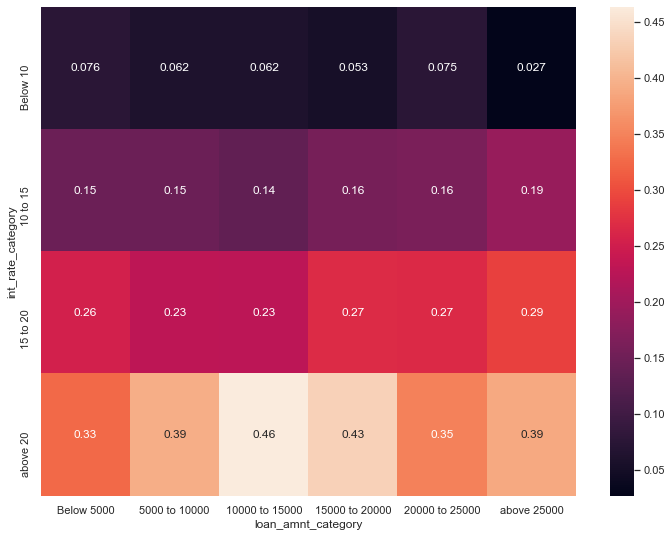

loan_amnt_category  Below 5000  5000 to 10000  10000 to 15000  15000 to 20000  \
int_rate_category                                                               
Below 10              0.075722       0.061849        0.062443        0.052778   
10 to 15              0.147943       0.146307        0.136666        0.158198   
15 to 20              0.255155       0.230638        0.229124        0.268908   
above 20              0.325581       0.394366        0.463636        0.433071   

loan_amnt_category  20000 to 25000  above 25000  
int_rate_category                                
Below 10                  0.074803     0.026786  
10 to 15                  0.162660     0.190860  
15 to 20                  0.266667     0.291139  
above 20                  0.348101     0.388889  


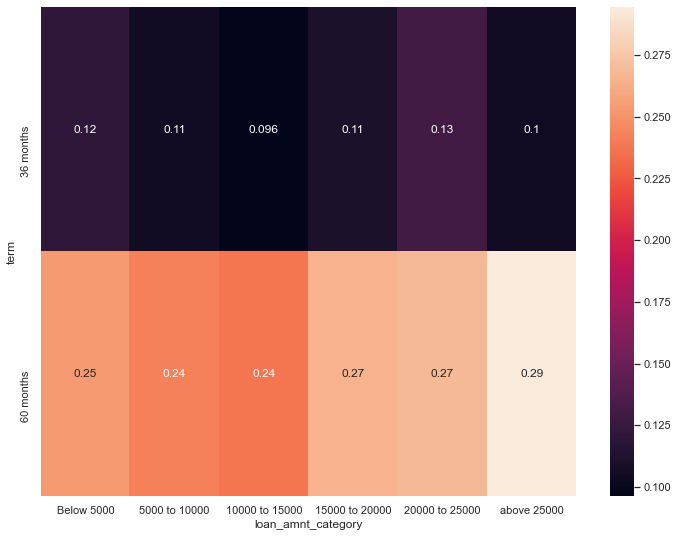

loan_amnt_category  Below 5000  5000 to 10000  10000 to 15000  15000 to 20000  \
term                                                                            
36 months             0.120965       0.105330        0.096206        0.110524   
60 months             0.253623       0.242252        0.237240        0.265436   

loan_amnt_category  20000 to 25000  above 25000  
term                                             
36 months                 0.130682     0.104167  
60 months                 0.268251     0.294471  


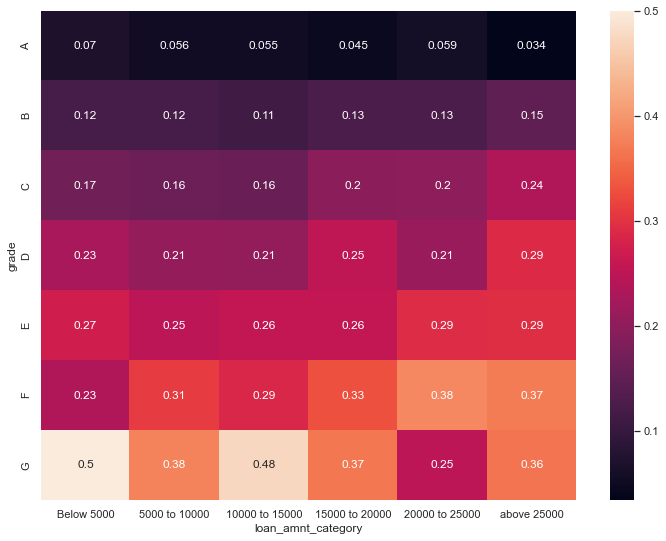

loan_amnt_category  Below 5000  5000 to 10000  10000 to 15000  15000 to 20000  \
grade                                                                           
A                     0.069784       0.055710        0.054958        0.045113   
B                     0.121234       0.121391        0.112473        0.125394   
C                     0.170519       0.161667        0.160912        0.197088   
D                     0.228745       0.208027        0.205653        0.253125   
E                     0.272989       0.249538        0.257669        0.257642   
F                     0.234568       0.309859        0.285714        0.329268   
G                     0.500000       0.379310        0.476190        0.367347   

loan_amnt_category  20000 to 25000  above 25000  
grade                                            
A                         0.059211     0.034091  
B                         0.126467     0.150215  
C                         0.200418     0.235955  
D                   

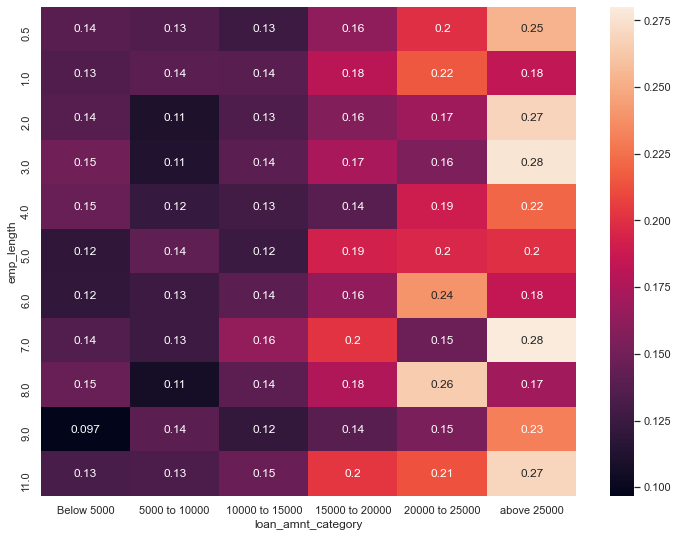

loan_amnt_category  Below 5000  5000 to 10000  10000 to 15000  15000 to 20000  \
emp_length                                                                      
0.5                   0.138396       0.134868        0.125323        0.163212   
1.0                   0.134703       0.140127        0.139576        0.180602   
2.0                   0.138079       0.110523        0.134518        0.157182   
3.0                   0.149000       0.112500        0.139949        0.173228   
4.0                   0.145729       0.122995        0.128936        0.139205   
5.0                   0.119611       0.141929        0.124800        0.192420   
6.0                   0.120833       0.125360        0.140187        0.163347   
7.0                   0.135977       0.126374        0.164420        0.201835   
8.0                   0.145763       0.107221        0.140351        0.175439   
9.0                   0.096639       0.139665        0.121324        0.138365   
11.0                  0.1322

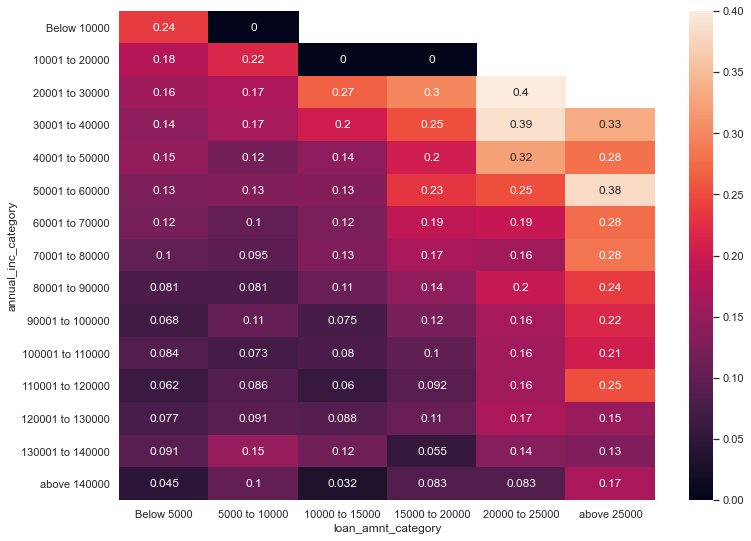

loan_amnt_category   Below 5000  5000 to 10000  10000 to 15000  \
annual_inc_category                                              
Below 10000            0.236111       0.000000             NaN   
10001 to 20000         0.178218       0.216216        0.000000   
20001 to 30000         0.157459       0.170623        0.267267   
30001 to 40000         0.143378       0.165235        0.204380   
40001 to 50000         0.147660       0.119787        0.143702   
50001 to 60000         0.127090       0.131349        0.133556   
60001 to 70000         0.120779       0.101695        0.124861   
70001 to 80000         0.101476       0.095376        0.129652   
80001 to 90000         0.080745       0.080863        0.106643   
90001 to 100000        0.068100       0.105461        0.075221   
100001 to 110000       0.084416       0.072664        0.079710   
110001 to 120000       0.061538       0.086207        0.060302   
120001 to 130000       0.076923       0.090909        0.088398   
130001 to 

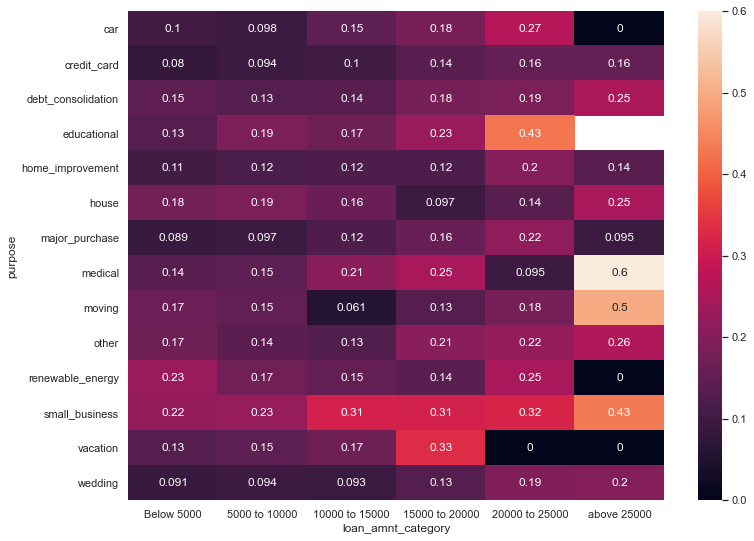

loan_amnt_category  Below 5000  5000 to 10000  10000 to 15000  15000 to 20000  \
purpose                                                                         
car                   0.104334       0.097973        0.147059        0.184211   
credit_card           0.080194       0.093880        0.102431        0.137391   
debt_consolidation    0.149220       0.132055        0.136496        0.181339   
educational           0.134615       0.190000        0.166667        0.230769   
home_improvement      0.105485       0.117786        0.122727        0.123932   
house                 0.177419       0.185841        0.162162        0.096774   
major_purchase        0.089307       0.097127        0.123762        0.159664   
medical               0.138577       0.147619        0.207317        0.250000   
moving                0.165079       0.151316        0.060606        0.133333   
other                 0.168207       0.142982        0.127803        0.207650   
renewable_energy      0.2307

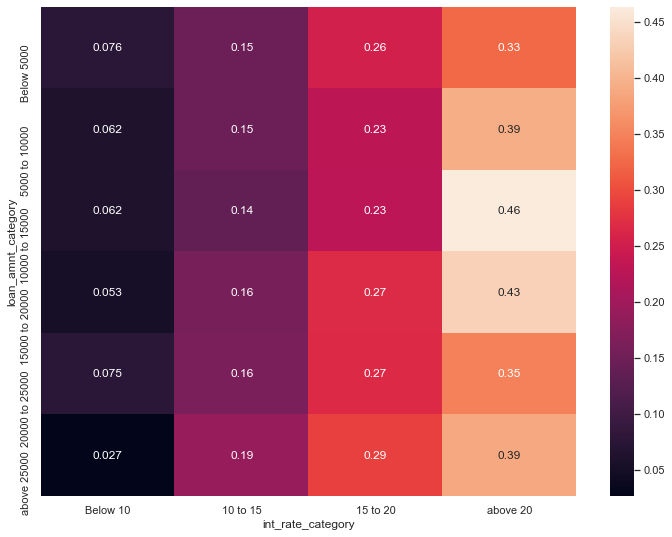

int_rate_category   Below 10  10 to 15  15 to 20  above 20
loan_amnt_category                                        
Below 5000          0.075722  0.147943  0.255155  0.325581
5000 to 10000       0.061849  0.146307  0.230638  0.394366
10000 to 15000      0.062443  0.136666  0.229124  0.463636
15000 to 20000      0.052778  0.158198  0.268908  0.433071
20000 to 25000      0.074803  0.162660  0.266667  0.348101
above 25000         0.026786  0.190860  0.291139  0.388889


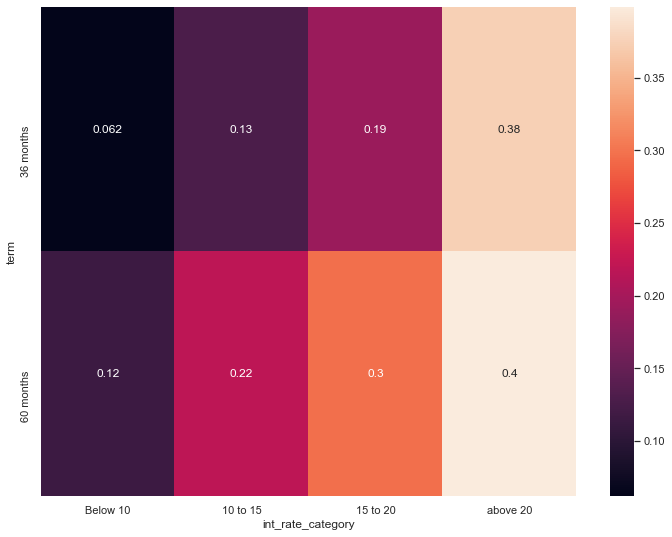

int_rate_category  Below 10  10 to 15  15 to 20  above 20
term                                                     
36 months          0.062049  0.128217  0.191419  0.375000
60 months          0.115702  0.219030  0.297193  0.398682


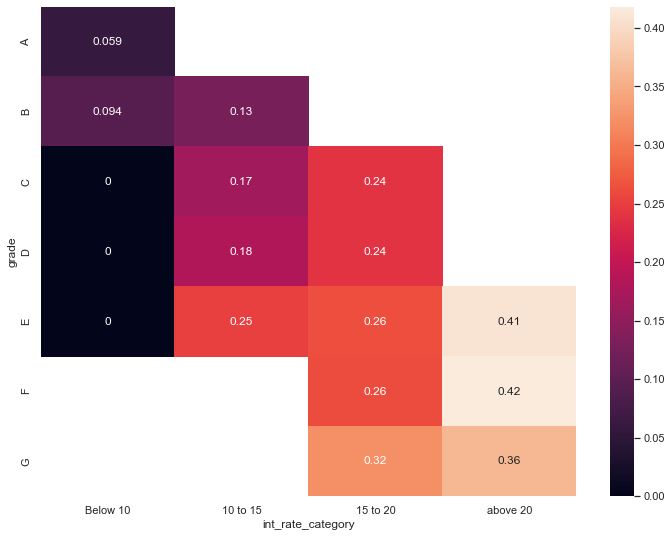

int_rate_category  Below 10  10 to 15  15 to 20  above 20
grade                                                    
A                  0.059083       NaN       NaN       NaN
B                  0.094412  0.127196       NaN       NaN
C                  0.000000  0.167619  0.238372       NaN
D                  0.000000  0.182512  0.238369       NaN
E                  0.000000  0.250000  0.263158  0.408451
F                       NaN       NaN  0.262646  0.417827
G                       NaN       NaN  0.320000  0.360996


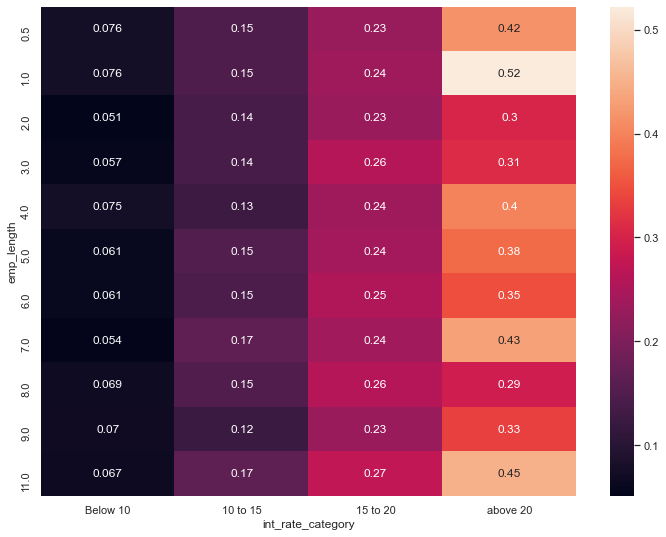

int_rate_category  Below 10  10 to 15  15 to 20  above 20
emp_length                                               
0.5                0.076003  0.147648  0.230663  0.416667
1.0                0.075991  0.148008  0.236084  0.521739
2.0                0.051012  0.140291  0.231884  0.303030
3.0                0.057363  0.140479  0.261939  0.311475
4.0                0.075173  0.128239  0.235759  0.400000
5.0                0.060729  0.150997  0.240464  0.375000
6.0                0.060958  0.145416  0.254408  0.347826
7.0                0.053892  0.167726  0.239130  0.432432
8.0                0.068817  0.149758  0.260504  0.291667
9.0                0.069588  0.123340  0.232143  0.333333
11.0               0.066768  0.165317  0.274952  0.451087


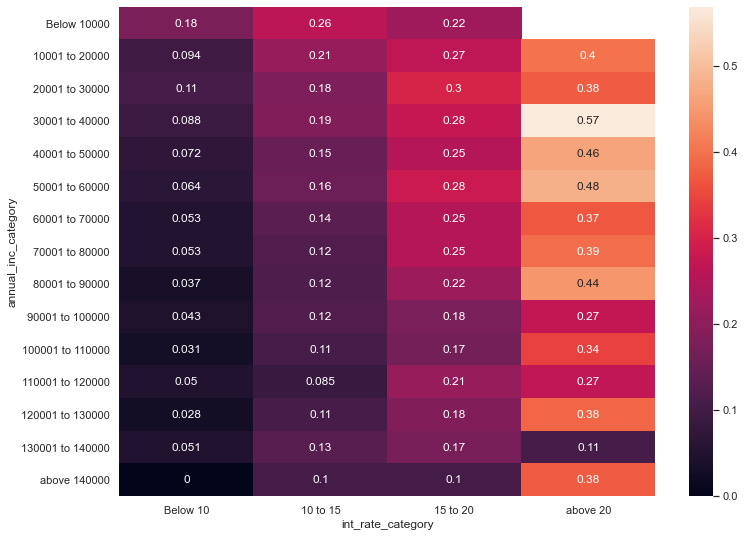

int_rate_category    Below 10  10 to 15  15 to 20  above 20
annual_inc_category                                        
Below 10000          0.178571  0.263158  0.222222       NaN
10001 to 20000       0.093960  0.214133  0.268293  0.400000
20001 to 30000       0.105416  0.180074  0.304000  0.375000
30001 to 40000       0.087563  0.185657  0.277167  0.568627
40001 to 50000       0.072439  0.152624  0.253266  0.464789
50001 to 60000       0.063842  0.155981  0.283001  0.481481
60001 to 70000       0.052671  0.135253  0.251630  0.370787
70001 to 80000       0.053211  0.119339  0.252648  0.393617
80001 to 90000       0.036939  0.116751  0.221053  0.444444
90001 to 100000      0.043408  0.117914  0.176471  0.271186
100001 to 110000     0.030899  0.105357  0.168627  0.340909
110001 to 120000     0.049861  0.085288  0.214286  0.270270
120001 to 130000     0.027650  0.107362  0.184713  0.384615
130001 to 140000     0.050725  0.130435  0.173554  0.105263
above 140000         0.000000  0.102273 

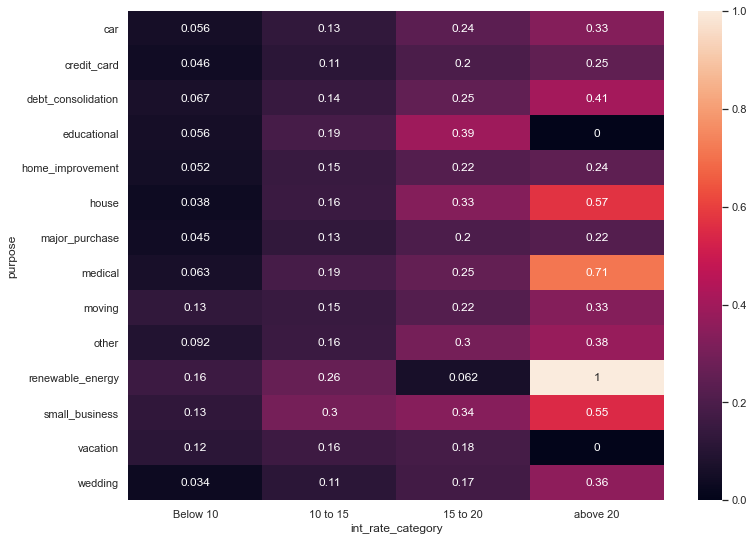

int_rate_category   Below 10  10 to 15  15 to 20  above 20
purpose                                                   
car                 0.055976  0.132042  0.235632  0.333333
credit_card         0.046125  0.114797  0.195994  0.246154
debt_consolidation  0.066551  0.144723  0.250752  0.409877
educational         0.055556  0.187166  0.392857  0.000000
home_improvement    0.051948  0.149816  0.218919  0.243243
house               0.038095  0.155556  0.333333  0.571429
major_purchase      0.044725  0.132775  0.202247  0.222222
medical             0.062780  0.185053  0.254545  0.714286
moving              0.129032  0.149606  0.219512  0.333333
other               0.091688  0.155443  0.298060  0.377778
renewable_energy    0.156250  0.263158  0.062500  1.000000
small_business      0.128141  0.300144  0.336449  0.550725
vacation            0.116438  0.163265  0.181818  0.000000
wedding             0.034483  0.114416  0.173611  0.357143


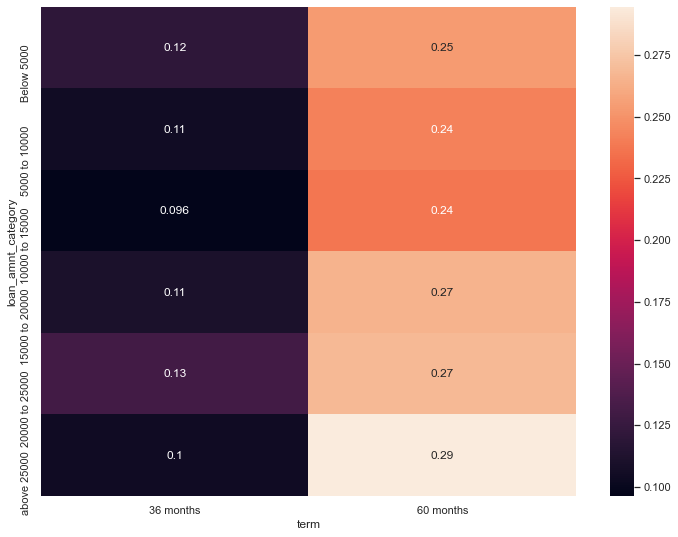

term                36 months  60 months
loan_amnt_category                      
Below 5000           0.120965   0.253623
5000 to 10000        0.105330   0.242252
10000 to 15000       0.096206   0.237240
15000 to 20000       0.110524   0.265436
20000 to 25000       0.130682   0.268251
above 25000          0.104167   0.294471


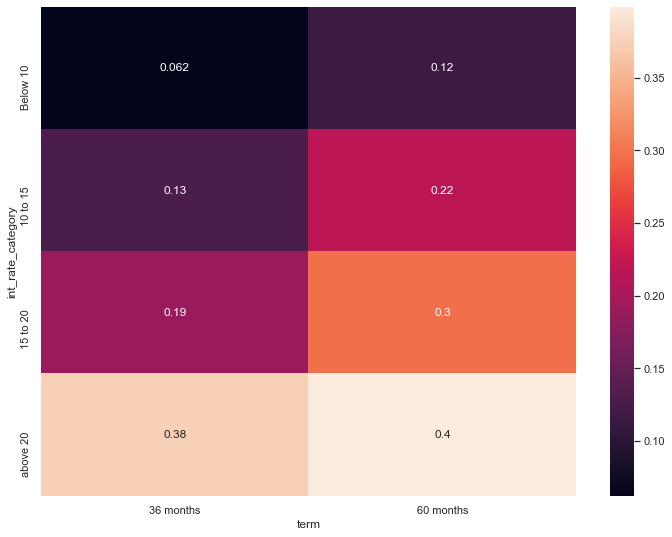

term               36 months  60 months
int_rate_category                      
Below 10            0.062049   0.115702
10 to 15            0.128217   0.219030
15 to 20            0.191419   0.297193
above 20            0.375000   0.398682


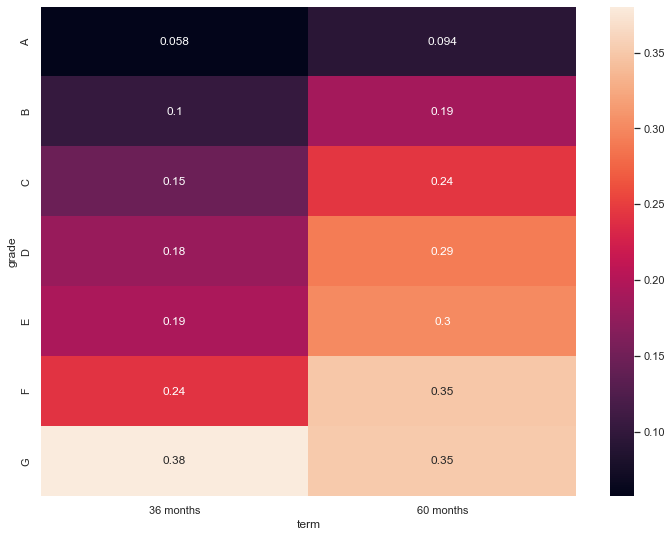

term   36 months  60 months
grade                      
A       0.057632   0.093834
B       0.103727   0.189425
C       0.146558   0.244719
D       0.180855   0.291475
E       0.194690   0.301898
F       0.241935   0.349345
G       0.380000   0.351852


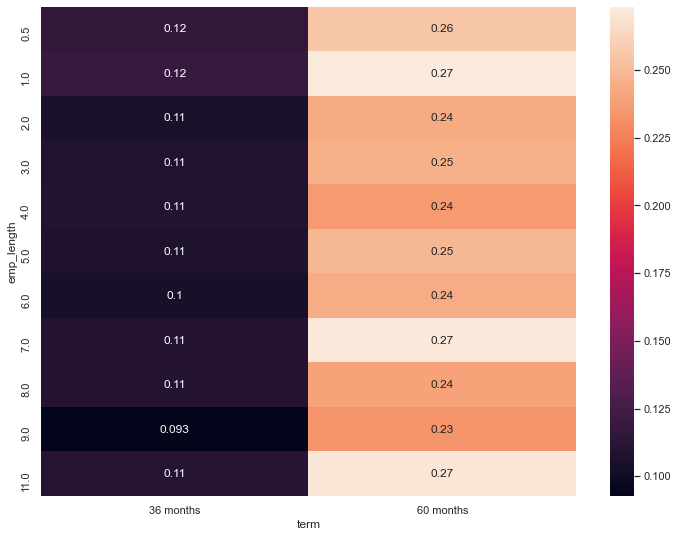

term        36 months  60 months
emp_length                      
0.5          0.116573   0.255051
1.0          0.118990   0.273214
2.0          0.105199   0.243081
3.0          0.108454   0.246277
4.0          0.108863   0.235849
5.0          0.106826   0.249066
6.0          0.104497   0.244288
7.0          0.109917   0.272311
8.0          0.109768   0.239437
9.0          0.092614   0.233553
11.0         0.110397   0.270942


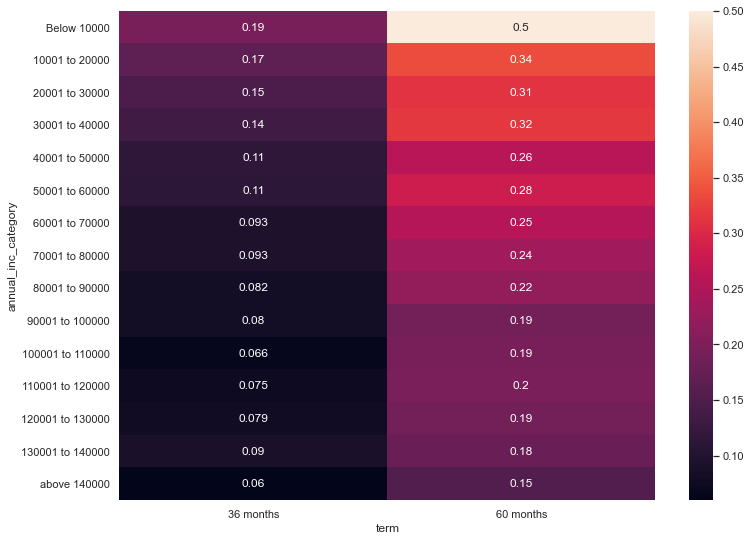

term                 36 months  60 months
annual_inc_category                      
Below 10000           0.194030   0.500000
10001 to 20000        0.166868   0.336449
20001 to 30000        0.148360   0.311594
30001 to 40000        0.135260   0.316746
40001 to 50000        0.113912   0.260120
50001 to 60000        0.112255   0.282923
60001 to 70000        0.092536   0.254460
70001 to 80000        0.092702   0.235169
80001 to 90000        0.081564   0.222384
90001 to 100000       0.080452   0.189142
100001 to 110000      0.066351   0.194070
110001 to 120000      0.074534   0.195804
120001 to 130000      0.078846   0.189320
130001 to 140000      0.089552   0.180000
above 140000          0.059701   0.153846


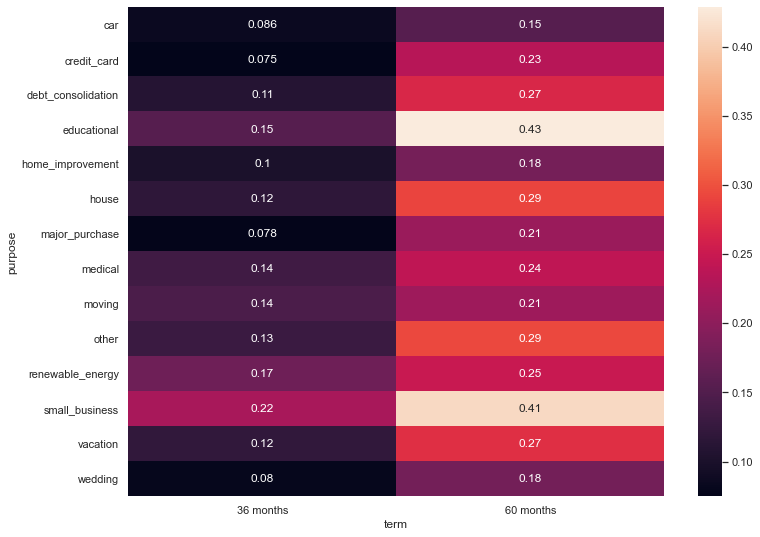

term                36 months  60 months
purpose                                 
car                  0.085870   0.154321
credit_card          0.074941   0.234624
debt_consolidation   0.110475   0.266392
educational          0.154110   0.428571
home_improvement     0.100111   0.180233
house                0.117904   0.291667
major_purchase       0.077694   0.211340
medical              0.135417   0.241135
moving               0.144144   0.214286
other                0.130151   0.294299
renewable_energy     0.174603   0.250000
small_business       0.222123   0.411135
vacation             0.121528   0.274510
wedding              0.080460   0.179894


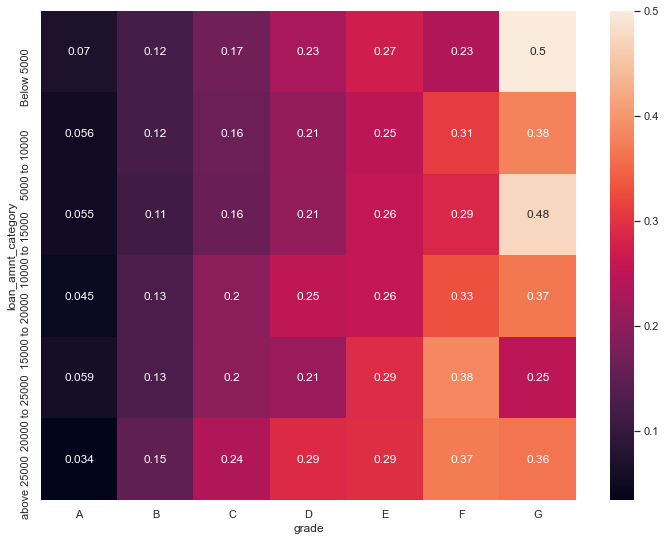

grade                      A         B         C         D         E  \
loan_amnt_category                                                     
Below 5000          0.069784  0.121234  0.170519  0.228745  0.272989   
5000 to 10000       0.055710  0.121391  0.161667  0.208027  0.249538   
10000 to 15000      0.054958  0.112473  0.160912  0.205653  0.257669   
15000 to 20000      0.045113  0.125394  0.197088  0.253125  0.257642   
20000 to 25000      0.059211  0.126467  0.200418  0.212471  0.293930   
above 25000         0.034091  0.150215  0.235955  0.289017  0.294545   

grade                      F         G  
loan_amnt_category                      
Below 5000          0.234568  0.500000  
5000 to 10000       0.309859  0.379310  
10000 to 15000      0.285714  0.476190  
15000 to 20000      0.329268  0.367347  
20000 to 25000      0.384615  0.250000  
above 25000         0.372093  0.363636  


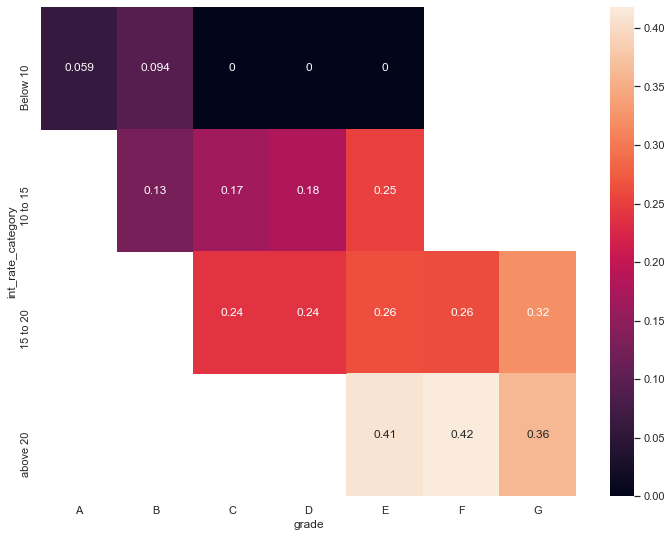

grade                     A         B         C         D         E         F  \
int_rate_category                                                               
Below 10           0.059083  0.094412  0.000000  0.000000  0.000000       NaN   
10 to 15                NaN  0.127196  0.167619  0.182512  0.250000       NaN   
15 to 20                NaN       NaN  0.238372  0.238369  0.263158  0.262646   
above 20                NaN       NaN       NaN       NaN  0.408451  0.417827   

grade                     G  
int_rate_category            
Below 10                NaN  
10 to 15                NaN  
15 to 20           0.320000  
above 20           0.360996  


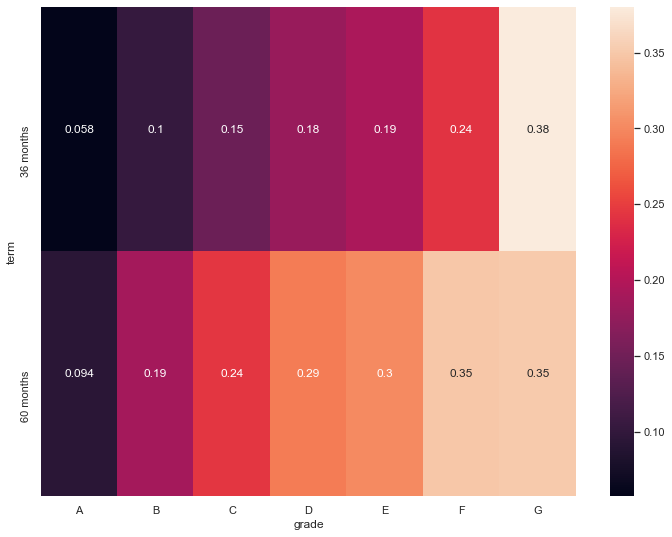

grade             A         B         C         D         E         F  \
term                                                                    
36 months  0.057632  0.103727  0.146558  0.180855  0.194690  0.241935   
60 months  0.093834  0.189425  0.244719  0.291475  0.301898  0.349345   

grade             G  
term                 
36 months  0.380000  
60 months  0.351852  


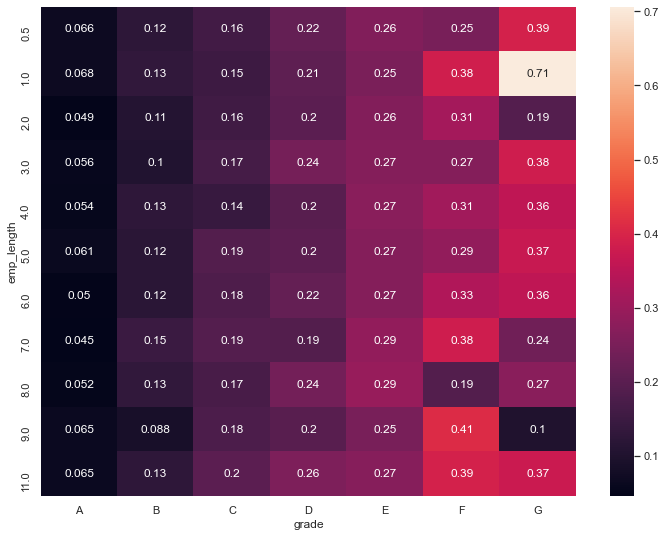

grade              A         B         C         D         E         F  \
emp_length                                                               
0.5         0.066151  0.123786  0.160679  0.217626  0.259928  0.247191   
1.0         0.067961  0.131250  0.152269  0.206573  0.250000  0.384615   
2.0         0.048583  0.109023  0.158145  0.201786  0.264605  0.314607   
3.0         0.055843  0.104237  0.165860  0.241584  0.266667  0.266667   
4.0         0.053922  0.125793  0.143075  0.196544  0.274775  0.308642   
5.0         0.061404  0.118557  0.188049  0.203883  0.265700  0.285714   
6.0         0.050360  0.118590  0.181384  0.216117  0.266667  0.333333   
7.0         0.045455  0.146640  0.191549  0.189573  0.287037  0.382979   
8.0         0.052493  0.132832  0.170455  0.239766  0.294118  0.189189   
9.0         0.064615  0.087719  0.177778  0.196078  0.247059  0.411765   
11.0        0.064828  0.127327  0.200798  0.256585  0.269565  0.393013   

grade              G  
emp_length    

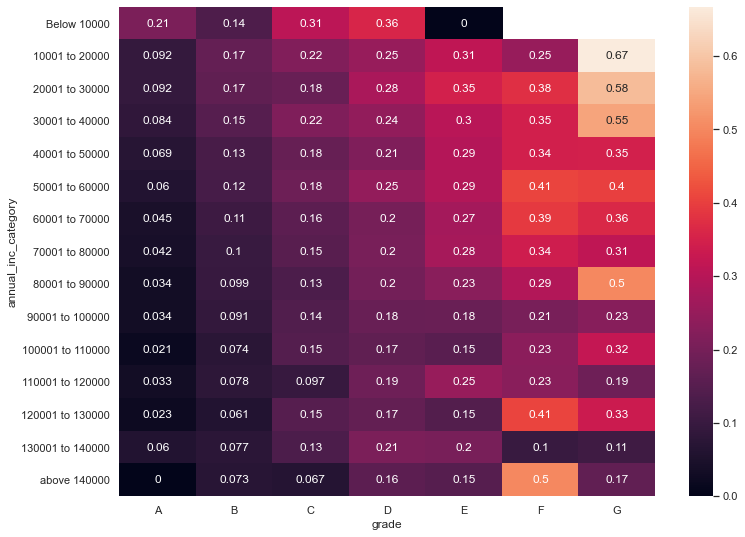

grade                       A         B         C         D         E  \
annual_inc_category                                                     
Below 10000          0.208333  0.136364  0.307692  0.357143  0.000000   
10001 to 20000       0.092105  0.174377  0.217593  0.251799  0.313725   
20001 to 30000       0.092437  0.165354  0.178873  0.280660  0.346939   
30001 to 40000       0.084261  0.150158  0.215993  0.243034  0.304348   
40001 to 50000       0.069273  0.126430  0.175987  0.214286  0.294461   
50001 to 60000       0.060192  0.123077  0.184987  0.246459  0.293506   
60001 to 70000       0.045245  0.109195  0.161206  0.203008  0.271186   
70001 to 80000       0.042222  0.100848  0.153263  0.203390  0.275000   
80001 to 90000       0.033546  0.098573  0.133758  0.196923  0.230769   
90001 to 100000      0.033730  0.090586  0.142857  0.179104  0.180124   
100001 to 110000     0.020619  0.074176  0.147679  0.165563  0.154639   
110001 to 120000     0.032895  0.078231  0.097436  

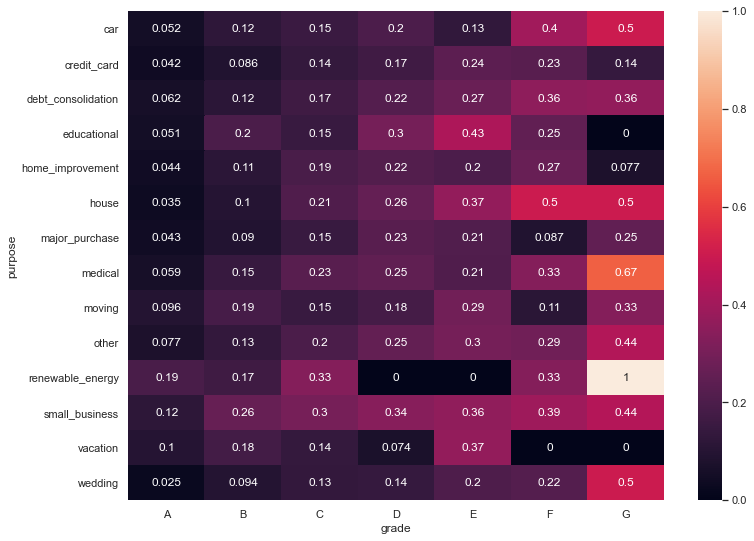

grade                      A         B         C         D         E  \
purpose                                                                
car                 0.052252  0.123570  0.153509  0.200000  0.129630   
credit_card         0.042081  0.086412  0.137896  0.168539  0.241525   
debt_consolidation  0.061796  0.116544  0.166990  0.219569  0.269622   
educational         0.051282  0.195652  0.149425  0.300000  0.428571   
home_improvement    0.044444  0.114973  0.193258  0.216000  0.200000   
house               0.035294  0.101124  0.209677  0.260870  0.370370   
major_purchase      0.043478  0.090239  0.151685  0.227907  0.214286   
medical             0.059140  0.147541  0.229508  0.246753  0.210526   
moving              0.095541  0.185629  0.149533  0.180328  0.291667   
other               0.076923  0.134758  0.196679  0.254505  0.297872   
renewable_energy    0.192308  0.166667  0.333333  0.000000  0.000000   
small_business      0.120253  0.264059  0.301639  0.342205  0.36

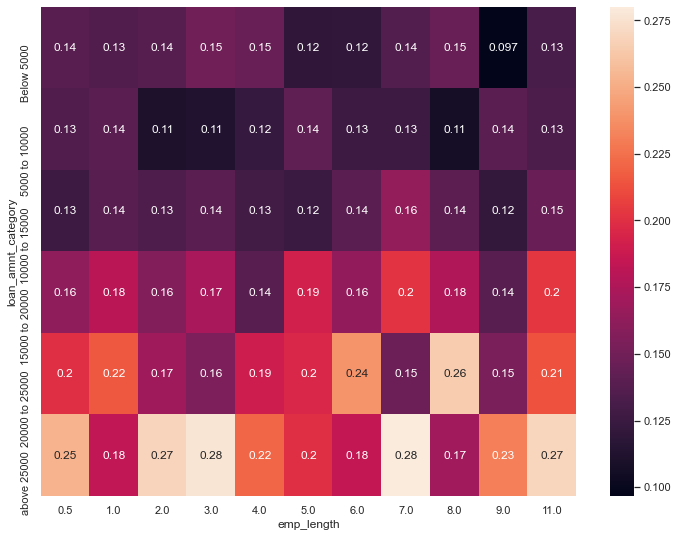

emp_length              0.5       1.0       2.0       3.0       4.0   \
loan_amnt_category                                                     
Below 5000          0.138396  0.134703  0.138079  0.149000  0.145729   
5000 to 10000       0.134868  0.140127  0.110523  0.112500  0.122995   
10000 to 15000      0.125323  0.139576  0.134518  0.139949  0.128936   
15000 to 20000      0.163212  0.180602  0.157182  0.173228  0.139205   
20000 to 25000      0.200000  0.215569  0.168269  0.155172  0.189474   
above 25000         0.253012  0.183673  0.269231  0.277108  0.220930   

emp_length              5.0       6.0       7.0       8.0       9.0       11.0  
loan_amnt_category                                                              
Below 5000          0.119611  0.120833  0.135977  0.145763  0.096639  0.132288  
5000 to 10000       0.141929  0.125360  0.126374  0.107221  0.139665  0.133305  
10000 to 15000      0.124800  0.140187  0.164420  0.140351  0.121324  0.146283  
15000 to 20000    

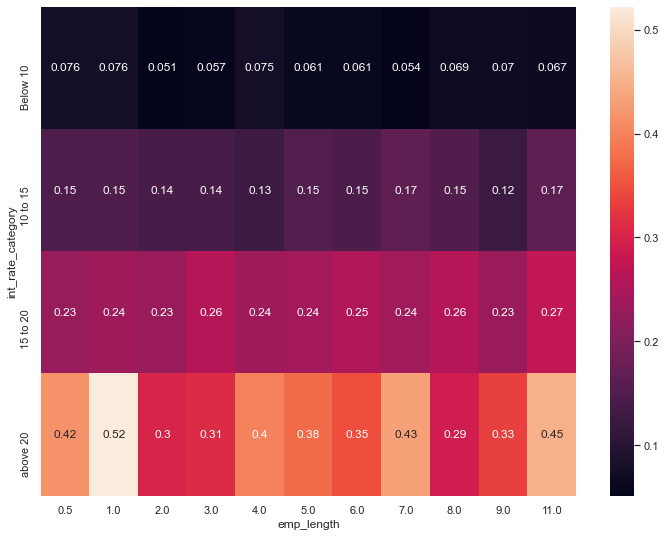

emp_length             0.5       1.0       2.0       3.0       4.0       5.0   \
int_rate_category                                                               
Below 10           0.076003  0.075991  0.051012  0.057363  0.075173  0.060729   
10 to 15           0.147648  0.148008  0.140291  0.140479  0.128239  0.150997   
15 to 20           0.230663  0.236084  0.231884  0.261939  0.235759  0.240464   
above 20           0.416667  0.521739  0.303030  0.311475  0.400000  0.375000   

emp_length             6.0       7.0       8.0       9.0       11.0  
int_rate_category                                                    
Below 10           0.060958  0.053892  0.068817  0.069588  0.066768  
10 to 15           0.145416  0.167726  0.149758  0.123340  0.165317  
15 to 20           0.254408  0.239130  0.260504  0.232143  0.274952  
above 20           0.347826  0.432432  0.291667  0.333333  0.451087  


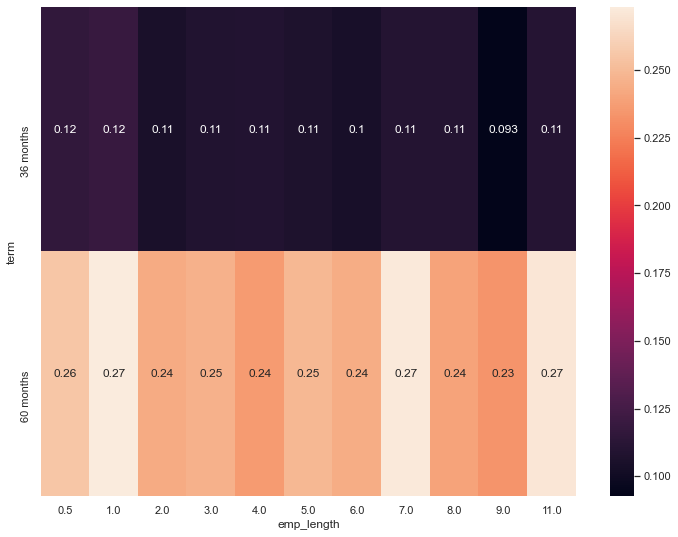

emp_length      0.5       1.0       2.0       3.0       4.0       5.0   \
term                                                                     
36 months   0.116573  0.118990  0.105199  0.108454  0.108863  0.106826   
60 months   0.255051  0.273214  0.243081  0.246277  0.235849  0.249066   

emp_length      6.0       7.0       8.0       9.0       11.0  
term                                                          
36 months   0.104497  0.109917  0.109768  0.092614  0.110397  
60 months   0.244288  0.272311  0.239437  0.233553  0.270942  


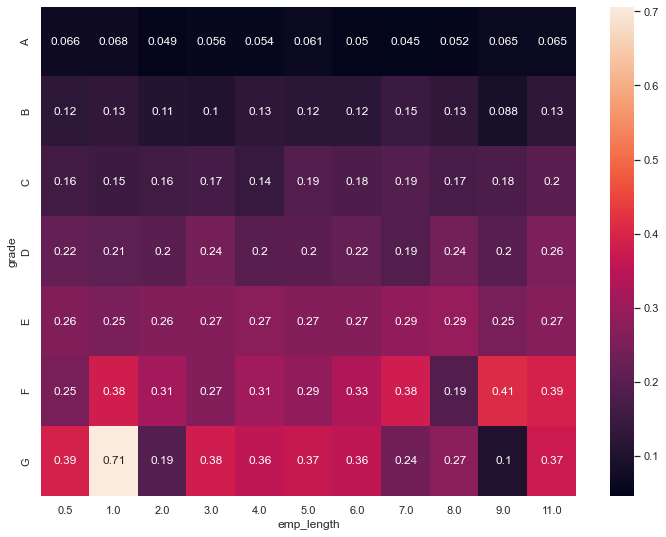

emp_length      0.5       1.0       2.0       3.0       4.0       5.0   \
grade                                                                    
A           0.066151  0.067961  0.048583  0.055843  0.053922  0.061404   
B           0.123786  0.131250  0.109023  0.104237  0.125793  0.118557   
C           0.160679  0.152269  0.158145  0.165860  0.143075  0.188049   
D           0.217626  0.206573  0.201786  0.241584  0.196544  0.203883   
E           0.259928  0.250000  0.264605  0.266667  0.274775  0.265700   
F           0.247191  0.384615  0.314607  0.266667  0.308642  0.285714   
G           0.392857  0.705882  0.190476  0.382353  0.357143  0.368421   

emp_length      6.0       7.0       8.0       9.0       11.0  
grade                                                         
A           0.050360  0.045455  0.052493  0.064615  0.064828  
B           0.118590  0.146640  0.132832  0.087719  0.127327  
C           0.181384  0.191549  0.170455  0.177778  0.200798  
D           0.2161

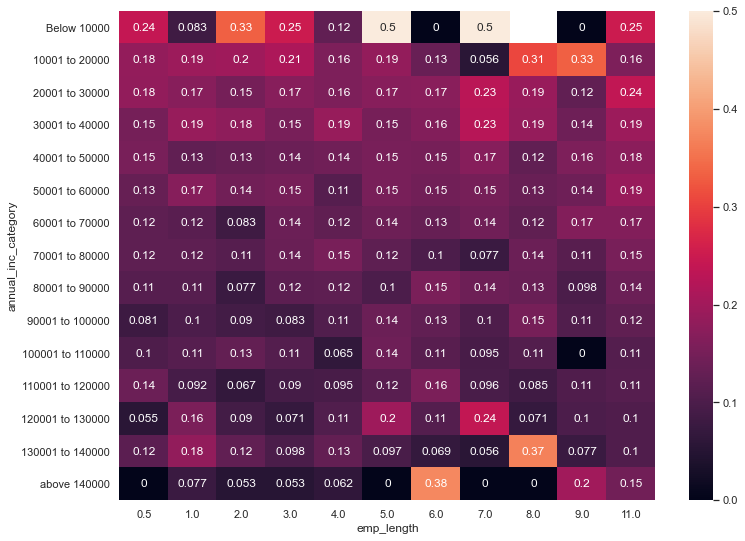

emp_length               0.5       1.0       2.0       3.0       4.0   \
annual_inc_category                                                     
Below 10000          0.241379  0.083333  0.333333  0.250000  0.125000   
10001 to 20000       0.184669  0.193548  0.197605  0.213592  0.158537   
20001 to 30000       0.182663  0.170103  0.149378  0.170918  0.159420   
30001 to 40000       0.148725  0.187856  0.178779  0.153584  0.189189   
40001 to 50000       0.153383  0.126033  0.131054  0.136876  0.143911   
50001 to 60000       0.131274  0.168203  0.144951  0.150592  0.112335   
60001 to 70000       0.121547  0.116129  0.082938  0.137339  0.123209   
70001 to 80000       0.122024  0.121622  0.112462  0.136628  0.154088   
80001 to 90000       0.111554  0.111765  0.077273  0.120370  0.122363   
90001 to 100000      0.080645  0.100000  0.089820  0.082803  0.107345   
100001 to 110000     0.102804  0.112676  0.128713  0.110000  0.065217   
110001 to 120000     0.137255  0.092308  0.066667  

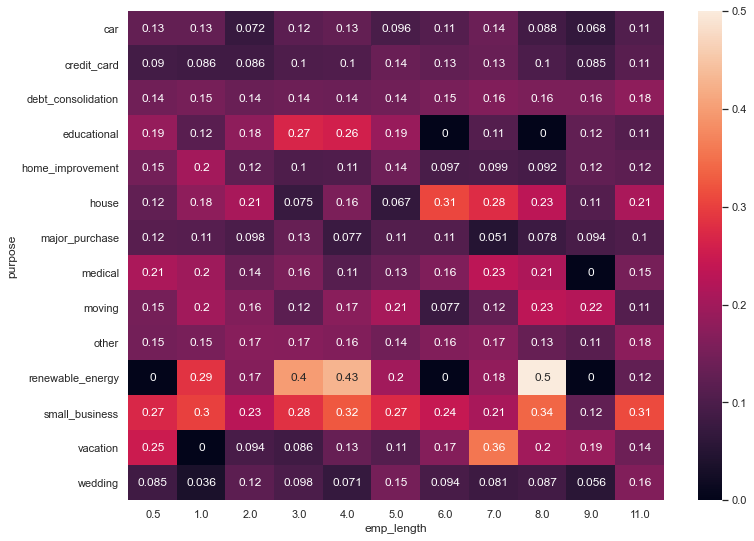

emp_length              0.5       1.0       2.0       3.0       4.0   \
purpose                                                                
car                 0.127168  0.127820  0.072368  0.118056  0.128205   
credit_card         0.089810  0.085779  0.085714  0.102459  0.104408   
debt_consolidation  0.143663  0.151648  0.136131  0.139381  0.136842   
educational         0.185714  0.116279  0.177778  0.269231  0.258065   
home_improvement    0.146919  0.201493  0.122047  0.102459  0.105263   
house               0.125000  0.178571  0.208333  0.075000  0.156250   
major_purchase      0.115079  0.112994  0.098291  0.132231  0.076923   
medical             0.211268  0.196429  0.135135  0.156250  0.113208   
moving              0.148438  0.200000  0.163934  0.118644  0.173077   
other               0.146586  0.153179  0.171362  0.168508  0.162338   
renewable_energy    0.000000  0.285714  0.166667  0.400000  0.428571   
small_business      0.270270  0.301205  0.227027  0.283422  0.32

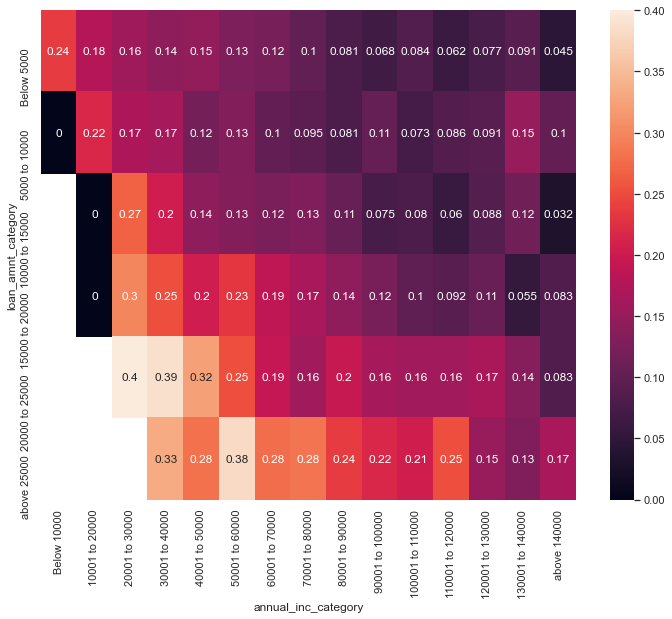

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
loan_amnt_category                                                 
Below 5000              0.236111        0.178218        0.157459   
5000 to 10000           0.000000        0.216216        0.170623   
10000 to 15000               NaN        0.000000        0.267267   
15000 to 20000               NaN        0.000000        0.300000   
20000 to 25000               NaN             NaN        0.400000   
above 25000                  NaN             NaN             NaN   

annual_inc_category  30001 to 40000  40001 to 50000  50001 to 60000  \
loan_amnt_category                                                    
Below 5000                 0.143378        0.147660        0.127090   
5000 to 10000              0.165235        0.119787        0.131349   
10000 to 15000             0.204380        0.143702        0.133556   
15000 to 20000             0.253125        0.204044        0.232068   
20000 to 25000             0.

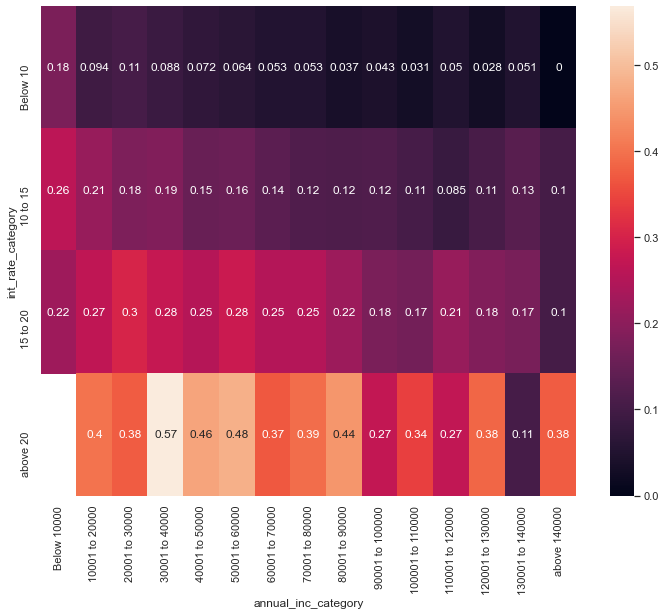

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
int_rate_category                                                  
Below 10                0.178571        0.093960        0.105416   
10 to 15                0.263158        0.214133        0.180074   
15 to 20                0.222222        0.268293        0.304000   
above 20                     NaN        0.400000        0.375000   

annual_inc_category  30001 to 40000  40001 to 50000  50001 to 60000  \
int_rate_category                                                     
Below 10                   0.087563        0.072439        0.063842   
10 to 15                   0.185657        0.152624        0.155981   
15 to 20                   0.277167        0.253266        0.283001   
above 20                   0.568627        0.464789        0.481481   

annual_inc_category  60001 to 70000  70001 to 80000  80001 to 90000  \
int_rate_category                                                     
Below 10              

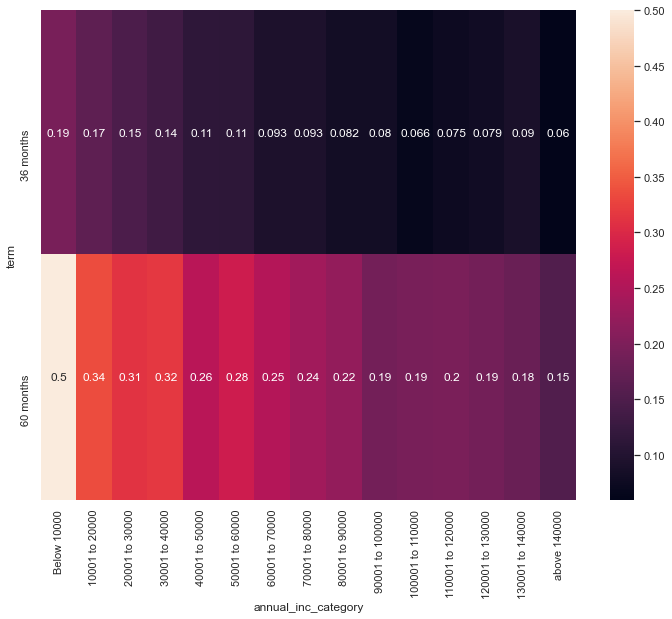

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
term                                                               
36 months                0.19403        0.166868        0.148360   
60 months                0.50000        0.336449        0.311594   

annual_inc_category  30001 to 40000  40001 to 50000  50001 to 60000  \
term                                                                  
36 months                  0.135260        0.113912        0.112255   
60 months                  0.316746        0.260120        0.282923   

annual_inc_category  60001 to 70000  70001 to 80000  80001 to 90000  \
term                                                                  
36 months                  0.092536        0.092702        0.081564   
60 months                  0.254460        0.235169        0.222384   

annual_inc_category  90001 to 100000  100001 to 110000  110001 to 120000  \
term                                                                       
36 mo

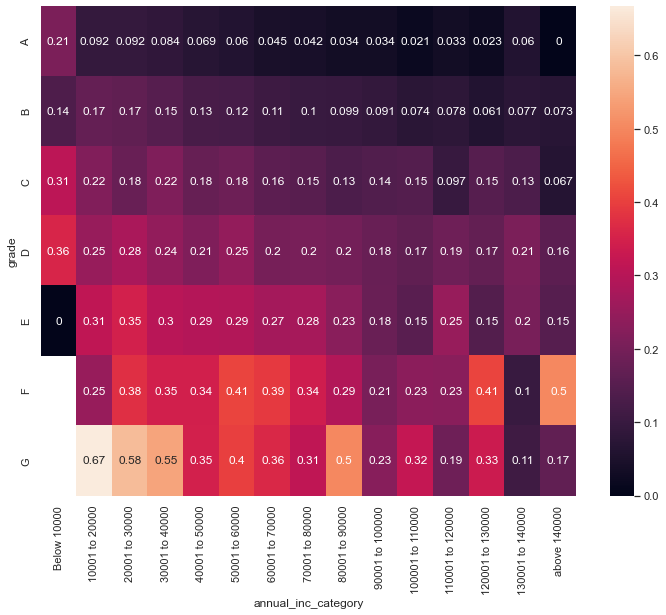

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
grade                                                              
A                       0.208333        0.092105        0.092437   
B                       0.136364        0.174377        0.165354   
C                       0.307692        0.217593        0.178873   
D                       0.357143        0.251799        0.280660   
E                       0.000000        0.313725        0.346939   
F                            NaN        0.250000        0.375000   
G                            NaN        0.666667        0.583333   

annual_inc_category  30001 to 40000  40001 to 50000  50001 to 60000  \
grade                                                                 
A                          0.084261        0.069273        0.060192   
B                          0.150158        0.126430        0.123077   
C                          0.215993        0.175987        0.184987   
D                          0.243

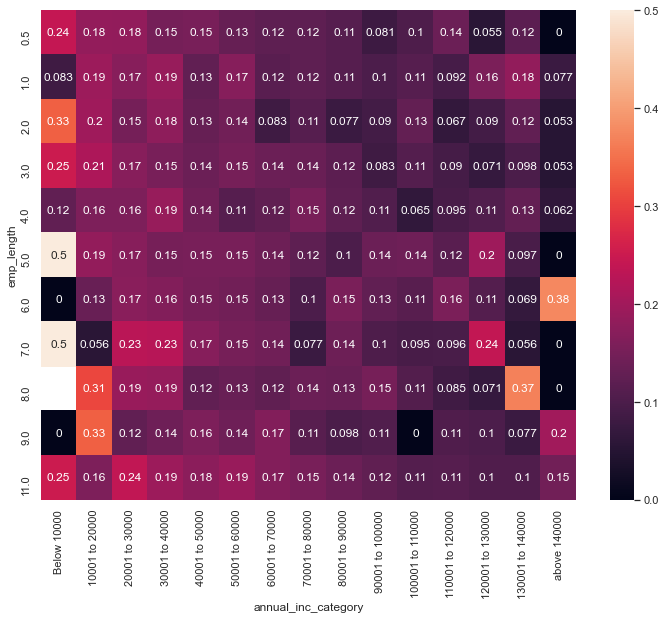

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
emp_length                                                         
0.5                     0.241379        0.184669        0.182663   
1.0                     0.083333        0.193548        0.170103   
2.0                     0.333333        0.197605        0.149378   
3.0                     0.250000        0.213592        0.170918   
4.0                     0.125000        0.158537        0.159420   
5.0                     0.500000        0.185185        0.170455   
6.0                     0.000000        0.133333        0.172973   
7.0                     0.500000        0.055556        0.230088   
8.0                          NaN        0.307692        0.189474   
9.0                     0.000000        0.333333        0.125000   
11.0                    0.250000        0.160000        0.238267   

annual_inc_category  30001 to 40000  40001 to 50000  50001 to 60000  \
emp_length                                  

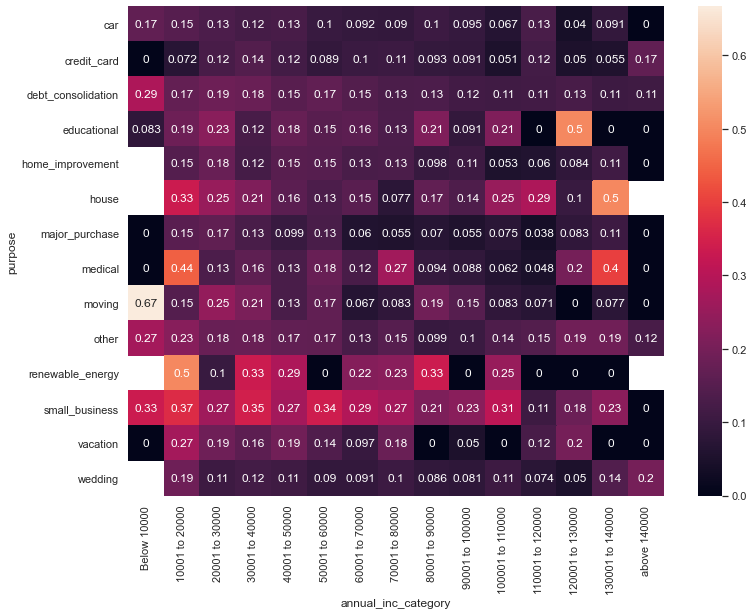

annual_inc_category  Below 10000  10001 to 20000  20001 to 30000  \
purpose                                                            
car                     0.166667        0.150943        0.134615   
credit_card             0.000000        0.072289        0.125000   
debt_consolidation      0.285714        0.170149        0.186429   
educational             0.083333        0.186047        0.229167   
home_improvement             NaN        0.148148        0.179310   
house                        NaN        0.333333        0.250000   
major_purchase          0.000000        0.153846        0.165939   
medical                 0.000000        0.444444        0.133333   
moving                  0.666667        0.147059        0.246377   
other                   0.272727        0.228571        0.177677   
renewable_energy             NaN        0.500000        0.100000   
small_business          0.333333        0.368421        0.265152   
vacation                0.000000        0.272727

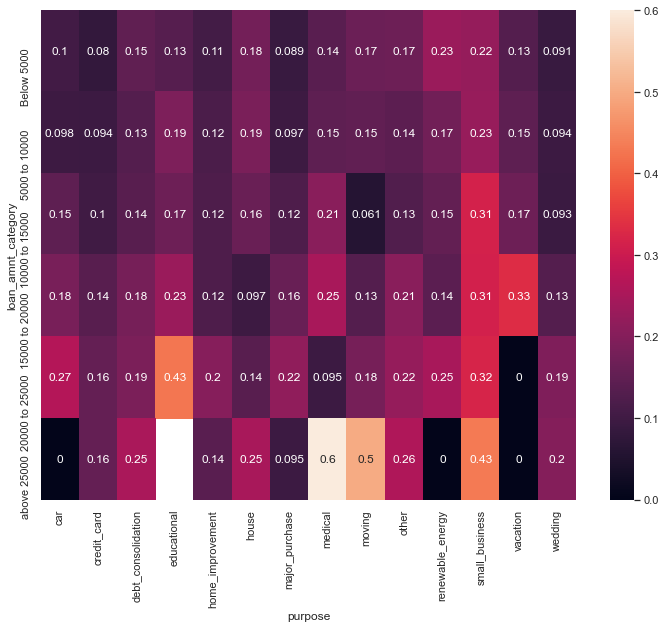

purpose                  car  credit_card  debt_consolidation  educational  \
loan_amnt_category                                                           
Below 5000          0.104334     0.080194            0.149220     0.134615   
5000 to 10000       0.097973     0.093880            0.132055     0.190000   
10000 to 15000      0.147059     0.102431            0.136496     0.166667   
15000 to 20000      0.184211     0.137391            0.181339     0.230769   
20000 to 25000      0.266667     0.156740            0.189560     0.428571   
above 25000         0.000000     0.155039            0.251841          NaN   

purpose             home_improvement     house  major_purchase   medical  \
loan_amnt_category                                                         
Below 5000                  0.105485  0.177419        0.089307  0.138577   
5000 to 10000               0.117786  0.185841        0.097127  0.147619   
10000 to 15000              0.122727  0.162162        0.123762  0.20731

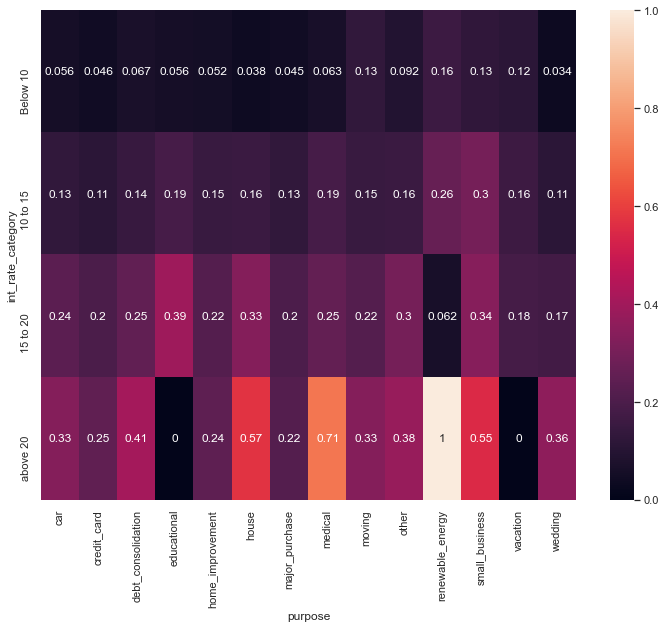

purpose                 car  credit_card  debt_consolidation  educational  \
int_rate_category                                                           
Below 10           0.055976     0.046125            0.066551     0.055556   
10 to 15           0.132042     0.114797            0.144723     0.187166   
15 to 20           0.235632     0.195994            0.250752     0.392857   
above 20           0.333333     0.246154            0.409877     0.000000   

purpose            home_improvement     house  major_purchase   medical  \
int_rate_category                                                         
Below 10                   0.051948  0.038095        0.044725  0.062780   
10 to 15                   0.149816  0.155556        0.132775  0.185053   
15 to 20                   0.218919  0.333333        0.202247  0.254545   
above 20                   0.243243  0.571429        0.222222  0.714286   

purpose              moving     other  renewable_energy  small_business  \
int_rate_ca

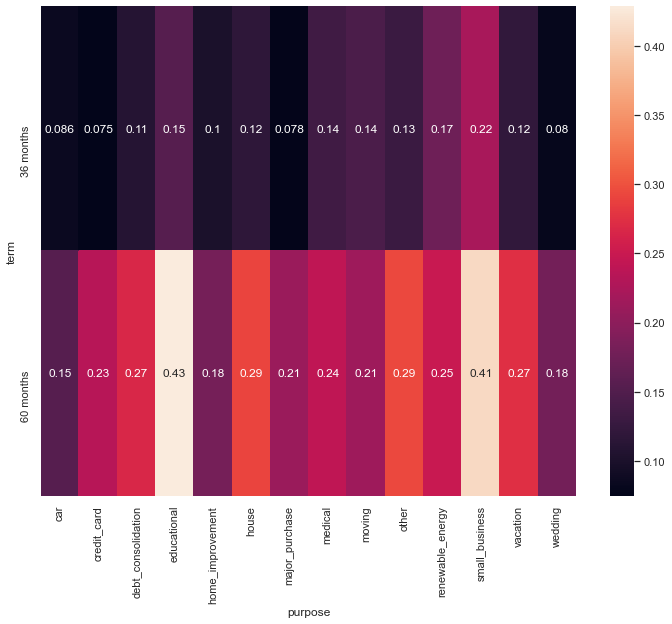

purpose         car  credit_card  debt_consolidation  educational  \
term                                                                
36 months  0.085870     0.074941            0.110475     0.154110   
60 months  0.154321     0.234624            0.266392     0.428571   

purpose    home_improvement     house  major_purchase   medical    moving  \
term                                                                        
36 months          0.100111  0.117904        0.077694  0.135417  0.144144   
60 months          0.180233  0.291667        0.211340  0.241135  0.214286   

purpose       other  renewable_energy  small_business  vacation   wedding  
term                                                                       
36 months  0.130151          0.174603        0.222123  0.121528  0.080460  
60 months  0.294299          0.250000        0.411135  0.274510  0.179894  


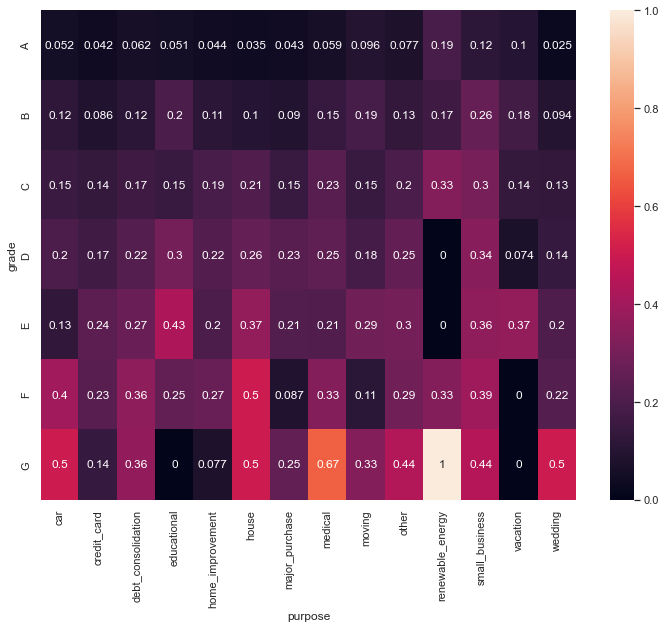

purpose       car  credit_card  debt_consolidation  educational  \
grade                                                             
A        0.052252     0.042081            0.061796     0.051282   
B        0.123570     0.086412            0.116544     0.195652   
C        0.153509     0.137896            0.166990     0.149425   
D        0.200000     0.168539            0.219569     0.300000   
E        0.129630     0.241525            0.269622     0.428571   
F        0.400000     0.227273            0.358566     0.250000   
G        0.500000     0.142857            0.364865     0.000000   

purpose  home_improvement     house  major_purchase   medical    moving  \
grade                                                                     
A                0.044444  0.035294        0.043478  0.059140  0.095541   
B                0.114973  0.101124        0.090239  0.147541  0.185629   
C                0.193258  0.209677        0.151685  0.229508  0.149533   
D                0.21

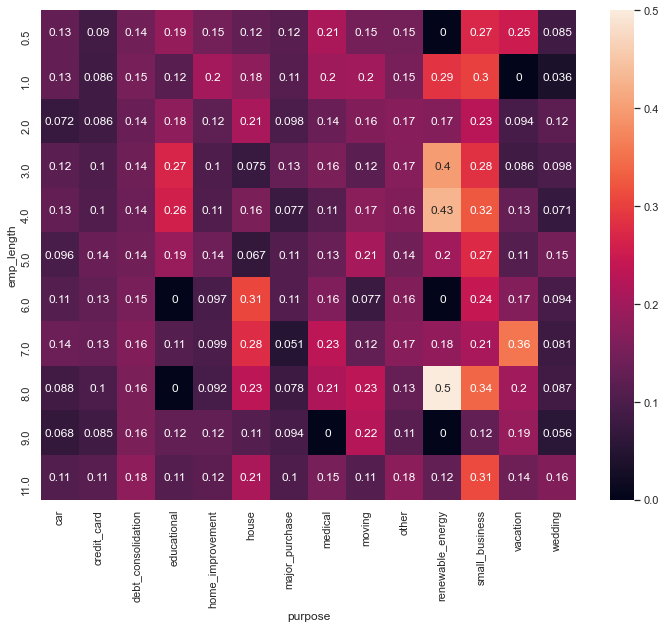

purpose          car  credit_card  debt_consolidation  educational  \
emp_length                                                           
0.5         0.127168     0.089810            0.143663     0.185714   
1.0         0.127820     0.085779            0.151648     0.116279   
2.0         0.072368     0.085714            0.136131     0.177778   
3.0         0.118056     0.102459            0.139381     0.269231   
4.0         0.128205     0.104408            0.136842     0.258065   
5.0         0.096000     0.135279            0.144505     0.190476   
6.0         0.111111     0.125926            0.152526     0.000000   
7.0         0.136986     0.133333            0.163772     0.111111   
8.0         0.087719     0.100000            0.156342     0.000000   
9.0         0.068182     0.084848            0.157244     0.125000   
11.0        0.107383     0.113949            0.178218     0.111111   

purpose     home_improvement     house  major_purchase   medical    moving  \
emp_length 

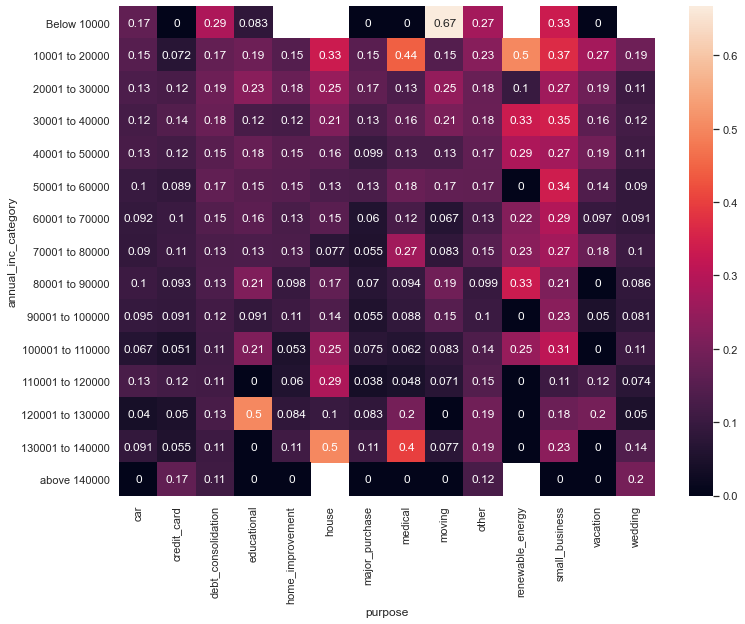

purpose                   car  credit_card  debt_consolidation  educational  \
annual_inc_category                                                           
Below 10000          0.166667     0.000000            0.285714     0.083333   
10001 to 20000       0.150943     0.072289            0.170149     0.186047   
20001 to 30000       0.134615     0.125000            0.186429     0.229167   
30001 to 40000       0.122340     0.144385            0.181003     0.125000   
40001 to 50000       0.126087     0.117647            0.152885     0.176471   
50001 to 60000       0.099548     0.088858            0.167856     0.151515   
60001 to 70000       0.092308     0.103131            0.145383     0.160000   
70001 to 80000       0.089552     0.106122            0.130973     0.133333   
80001 to 90000       0.104651     0.093220            0.133845     0.214286   
90001 to 100000      0.094595     0.090909            0.115342     0.090909   
100001 to 110000     0.066667     0.050505          

In [127]:
for col_item in plot_lst:
    for index_item in plot_lst:
        if(col_item!=index_item):
            plt.figure(figsize=(12, 9))
            res_df = pd.pivot_table(data=final_loan_df_2, index= index_item, columns=col_item, values="charged_off_status")
            sns.heatmap(res_df, annot=True)
            plt.show()
            print(res_df)


## Recommendations based on above analysis -

1. Gradation system may be used as a reliable indicator. Probability of default increases linearly with worsening grade.
2. Loan applicant with annual income below 10000 more likely to default compare to others.
3. Loan should be approved after careful scrutiny for person with lower income,  who opted for longer term loan and higher interest rate
4. Person taking loan for small business purpose is more likely to default
5. History of public record bankruptcy is an early warning sign of possible future default.
6. Loan amount above 25000 is more likely to default. It should be sanctioned only after considering grade and other mentioned indicators
7. Charge off percentage increases when the interest rate is increased.
8. Also longer term increases the chances of getting defaulted.